In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/intrusion-in-iot/cleaned_iot.csv


In [2]:
#!pip install xgboost
#!pip install catboost
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("/kaggle/input/intrusion-in-iot/cleaned_iot.csv")
df

flow_duration  Header_Length  Protocol Type  Duration         Rate  \
0             0.000000          54.00           6.00     64.00     0.329807   
1             0.000000          57.04           6.33     64.00     4.290556   
2             0.000000           0.00           1.00     64.00    33.396799   
3             0.328175       76175.00          17.00     64.00  4642.133010   
4             0.117320         101.73           6.11     65.91     6.202211   
...                ...            ...            ...       ...          ...   
1048570       1.391925         108.00           6.00     64.00     1.437685   
1048571       0.000000           2.14          46.70     65.91     0.000000   
1048572       0.132971       30847.00          17.00     64.00  5978.034950   
1048573       0.000000          54.00           6.00     64.00    25.672981   
1048574     128.443556        4264.30           7.10     98.80    13.640648   

               Srate  Drate  fin_flag_number  syn_flag_number  \
0           0.329807    0.0                1                0   
1           4.290556    0.0                0                0   
2          33.396799    0.0                0                0   
3        4642.133010    0.0                0                0   
4           6.202211    0.0                0                1   
...              ...    ...              ...              ...   
1048570     1.437685    0.0                0                1   
1048571     0.000000    0.0                0                0   
1048572  5978.034950    0.0                0                0   
1048573    25.672981    0.0                1                0   
1048574    13.640648    0.0                0                0   

         rst_flag_number  ...         Std  Tot size           IAT  Number  \
0                      1  ...    0.000000     54.00  8.334383e+07     9.5   
1                      0  ...    2.822973     57.04  8.292607e+07     9.5   
2                      0  ...    0.000000     42.00  8.312799e+07     9.5   
3                      0  ...    0.000000     50.00  8.301570e+07     9.5   
4                      0  ...   23.113111     57.88  8.297300e+07     9.5   
...                  ...  ...         ...       ...           ...     ...   
1048570                0  ...    0.000000     54.00  8.336550e+07     9.5   
1048571                0  ...    5.281048    588.22  8.367732e+07     9.5   
1048572                0  ...    0.000000     50.00  8.312373e+07     9.5   
1048573                1  ...    0.000000     54.00  8.334509e+07     9.5   
1048574                0  ...  114.400450     96.70  1.665173e+08    13.5   

          Magnitue      Radius    Covariance  Variance  Weight  \
0        10.392305    0.000000      0.000000      0.00  141.55   
1        10.464666    4.010353    160.987842      0.05  141.55   
2         9.165151    0.000000      0.000000      0.00  141.55   
3        10.000000    0.000000      0.000000      0.00  141.55   
4        11.346876   32.716243   3016.808286      0.19  141.55   
...            ...         ...           ...       ...     ...   
1048570  10.392305    0.000000      0.000000      0.00  141.55   
1048571  34.370618    7.497140    469.190222      0.06  141.55   
1048572  10.000000    0.000000      0.000000      0.00  141.55   
1048573  10.392305    0.000000      0.000000      0.00  141.55   
1048574  17.124571  162.030508  13140.079760      1.00  244.60   

                           label  
0               DDoS-RSTFINFlood  
1                  DoS-TCP_Flood  
2                DDoS-ICMP_Flood  
3                  DoS-UDP_Flood  
4                  DoS-SYN_Flood  
...                          ...  
1048570  DDoS-SynonymousIP_Flood  
1048571       Mirai-greeth_flood  
1048572           DDoS-UDP_Flood  
1048573         DDoS-RSTFINFlood  
1048574            BenignTraffic  

[1048575 rows x 47 columns]

In [6]:
df.describe()

flow_duration  Header_Length  Protocol Type      Duration  \
count   1.048575e+06   1.048575e+06   1.048575e+06  1.048575e+06   
mean    5.763553e+00   7.759537e+04   9.062979e+00  6.635523e+01   
std     2.965660e+02   4.664043e+05   8.936737e+00  1.408680e+01   
min     0.000000e+00   0.000000e+00   0.000000e+00  0.000000e+00   
25%     0.000000e+00   5.400000e+01   6.000000e+00  6.400000e+01   
50%     0.000000e+00   5.400000e+01   6.000000e+00  6.400000e+01   
75%     1.042881e-01   2.781200e+02   1.428000e+01  6.400000e+01   
max     9.943576e+04   9.815555e+06   4.700000e+01  2.550000e+02   

               Rate         Srate         Drate  fin_flag_number  \
count  1.048575e+06  1.048575e+06  1.048575e+06     1.048575e+06   
mean   9.146945e+03  9.146945e+03  1.807621e-06     8.655842e-02   
std    9.974794e+04  9.974794e+04  8.501385e-04     2.811870e-01   
min    0.000000e+00  0.000000e+00  0.000000e+00     0.000000e+00   
25%    2.087155e+00  2.087155e+00  0.000000e+00     0.000000e+00   
50%    1.581371e+01  1.581371e+01  0.000000e+00     0.000000e+00   
75%    1.174380e+02  1.174380e+02  0.000000e+00     0.000000e+00   
max    7.340032e+06  7.340032e+06  8.484654e-01     1.000000e+00   

       syn_flag_number  rst_flag_number  ...           AVG           Std  \
count     1.048575e+06     1.048575e+06  ...  1.048575e+06  1.048575e+06   
mean      2.073090e-01     9.057149e-02  ...  1.248502e+02  3.345817e+01   
std       4.053790e-01     2.869989e-01  ...  2.420296e+02  1.622552e+02   
min       0.000000e+00     0.000000e+00  ...  4.200000e+01  0.000000e+00   
25%       0.000000e+00     0.000000e+00  ...  5.000000e+01  0.000000e+00   
50%       0.000000e+00     0.000000e+00  ...  5.400000e+01  0.000000e+00   
75%       0.000000e+00     0.000000e+00  ...  5.405208e+01  3.777740e-01   
max       1.000000e+00     1.000000e+00  ...  8.040961e+03  1.099626e+04   

           Tot size           IAT        Number      Magnitue        Radius  \
count  1.048575e+06  1.048575e+06  1.048575e+06  1.048575e+06  1.048575e+06   
mean   1.248978e+02  8.317382e+07  9.497998e+00  1.312711e+01  4.728151e+01   
std    2.429223e+02  1.703857e+07  8.187710e-01  8.639921e+00  2.294819e+02   
min    4.200000e+01  0.000000e+00  1.000000e+00  9.165151e+00  0.000000e+00   
25%    5.000000e+01  8.307157e+07  9.500000e+00  1.000000e+01  0.000000e+00   
50%    5.400000e+01  8.312452e+07  9.500000e+00  1.039230e+01  0.000000e+00   
75%    5.406000e+01  8.334390e+07  9.500000e+00  1.039675e+01  5.059213e-01   
max    1.309800e+04  1.676394e+08  1.500000e+01  1.252094e+02  1.555106e+04   

         Covariance      Variance        Weight  
count  1.048575e+06  1.048575e+06  1.048575e+06  
mean   3.147998e+04  9.635824e-02  1.414999e+02  
std    3.645895e+05  2.327718e-01  2.105725e+01  
min    0.000000e+00  0.000000e+00  1.000000e+00  
25%    0.000000e+00  0.000000e+00  1.415500e+02  
50%    0.000000e+00  0.000000e+00  1.415500e+02  
75%    1.370916e+00  8.000000e-02  1.415500e+02  
max    1.372844e+08  1.000000e+00  2.446000e+02  

[8 rows x 46 columns]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 47 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   flow_duration    1048575 non-null  float64
 1   Header_Length    1048575 non-null  float64
 2   Protocol Type    1048575 non-null  float64
 3   Duration         1048575 non-null  float64
 4   Rate             1048575 non-null  float64
 5   Srate            1048575 non-null  float64
 6   Drate            1048575 non-null  float64
 7   fin_flag_number  1048575 non-null  int64  
 8   syn_flag_number  1048575 non-null  int64  
 9   rst_flag_number  1048575 non-null  int64  
 10  psh_flag_number  1048575 non-null  int64  
 11  ack_flag_number  1048575 non-null  int64  
 12  ece_flag_number  1048575 non-null  int64  
 13  cwr_flag_number  1048575 non-null  int64  
 14  ack_count        1048575 non-null  float64
 15  syn_count        1048575 non-null  float64
 16  fin_count        1

In [5]:
# checking whether any null values are there
# we have checked from the above using info, but still by using this we can find

df.isnull().sum()

flow_duration      0
Header_Length      0
Protocol Type      0
Duration           0
Rate               0
Srate              0
Drate              0
fin_flag_number    0
syn_flag_number    0
rst_flag_number    0
psh_flag_number    0
ack_flag_number    0
ece_flag_number    0
cwr_flag_number    0
ack_count          0
syn_count          0
fin_count          0
urg_count          0
rst_count          0
HTTP               0
HTTPS              0
DNS                0
Telnet             0
SMTP               0
SSH                0
IRC                0
TCP                0
UDP                0
DHCP               0
ARP                0
ICMP               0
IPv                0
LLC                0
Tot sum            0
Min                0
Max                0
AVG                0
Std                0
Tot size           0
IAT                0
Number             0
Magnitue           0
Radius             0
Covariance         0
Variance           0
Weight             0
label              0
dtype: int64

In [4]:
# from the above, we can find there are no null values

df.duplicated().sum()

65556

In [5]:
df = df.drop_duplicates()
df.shape

(983019, 47)

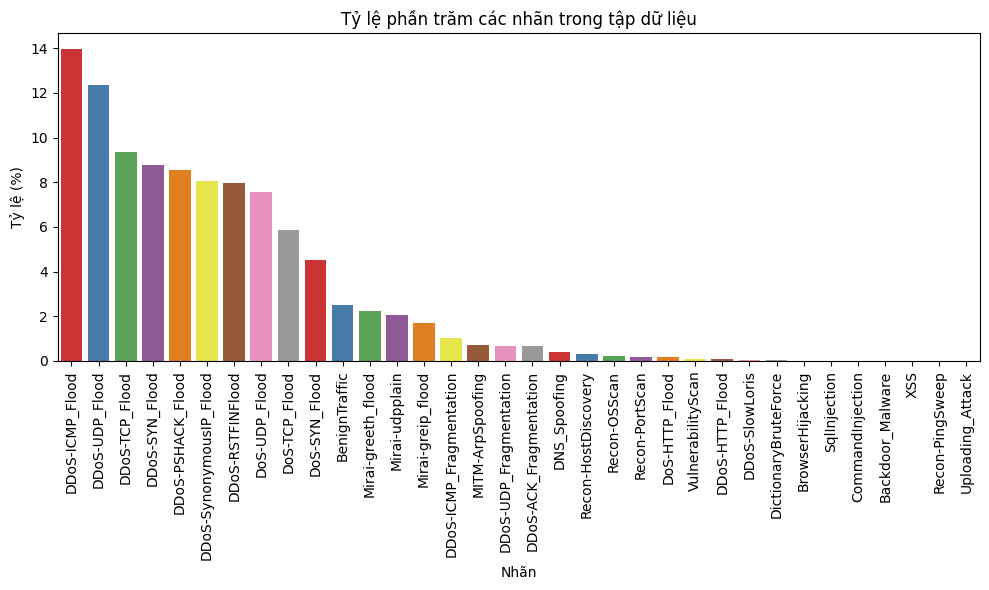

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tính tỷ lệ %
label_percent = df['label'].value_counts(normalize=True) * 100
label_percent = label_percent.sort_values(ascending=False)  # Sắp xếp giảm dần

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
sns.barplot(x=label_percent.index, y=label_percent.values, palette='Set1')

plt.title('Tỷ lệ phần trăm các nhãn trong tập dữ liệu', fontsize=12)
plt.xlabel('Nhãn')
plt.ylabel('Tỷ lệ (%)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [7]:
# Tính phần trăm từng nhãn
label_percent = df['label'].value_counts(normalize=True) * 100

# Xác định các nhãn nhỏ hơn 2%
low_freq_labels = label_percent[label_percent < 2].index

# Gộp các nhãn nhỏ lại thành "Other"
df['label_grouped'] = df['label'].apply(lambda x: 'Other' if x in low_freq_labels else x)

# (Tuỳ chọn) Xem danh sách các nhãn đã bị gộp
gop_labels = sorted(low_freq_labels.tolist())
print("Các nhãn bị gộp vào 'Other':", gop_labels)


Các nhãn bị gộp vào 'Other': ['Backdoor_Malware', 'BrowserHijacking', 'CommandInjection', 'DDoS-ACK_Fragmentation', 'DDoS-HTTP_Flood', 'DDoS-ICMP_Fragmentation', 'DDoS-SlowLoris', 'DDoS-UDP_Fragmentation', 'DNS_Spoofing', 'DictionaryBruteForce', 'DoS-HTTP_Flood', 'MITM-ArpSpoofing', 'Mirai-greip_flood', 'Recon-HostDiscovery', 'Recon-OSScan', 'Recon-PingSweep', 'Recon-PortScan', 'SqlInjection', 'Uploading_Attack', 'VulnerabilityScan', 'XSS']


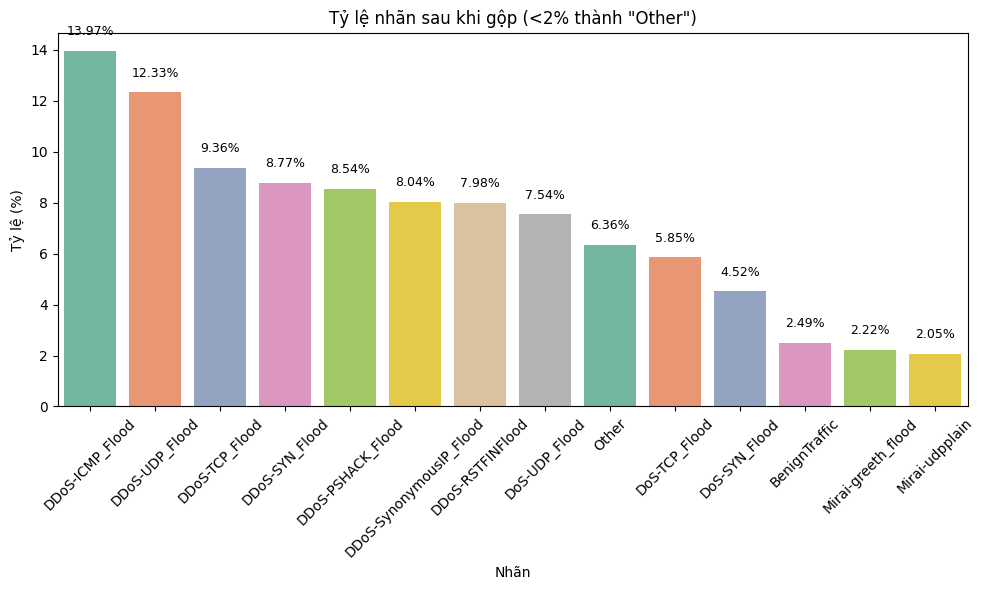

In [8]:
# Vẽ biểu đồ cột
import matplotlib.pyplot as plt
import seaborn as sns

label_grouped_percent = df['label_grouped'].value_counts(normalize=True) * 100
label_grouped_percent = label_grouped_percent.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=label_grouped_percent.index, y=label_grouped_percent.values, palette='Set2')

for i, val in enumerate(label_grouped_percent.values):
    plt.text(i, val + 0.5, f'{val:.2f}%', ha='center', va='bottom', fontsize=9)

plt.title('Tỷ lệ nhãn sau khi gộp (<2% thành "Other")')
plt.ylabel('Tỷ lệ (%)')
plt.xlabel('Nhãn')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [9]:
# Gán lại label bằng label_grouped
df['label'] = df['label_grouped']

# Xoá cột label_grouped
df.drop(columns=['label_grouped'], inplace=True)
df

flow_duration  Header_Length  Protocol Type  Duration         Rate  \
0             0.000000          54.00           6.00     64.00     0.329807   
1             0.000000          57.04           6.33     64.00     4.290556   
2             0.000000           0.00           1.00     64.00    33.396799   
3             0.328175       76175.00          17.00     64.00  4642.133010   
4             0.117320         101.73           6.11     65.91     6.202211   
...                ...            ...            ...       ...          ...   
1048570       1.391925         108.00           6.00     64.00     1.437685   
1048571       0.000000           2.14          46.70     65.91     0.000000   
1048572       0.132971       30847.00          17.00     64.00  5978.034950   
1048573       0.000000          54.00           6.00     64.00    25.672981   
1048574     128.443556        4264.30           7.10     98.80    13.640648   

               Srate  Drate  fin_flag_number  syn_flag_number  \
0           0.329807    0.0                1                0   
1           4.290556    0.0                0                0   
2          33.396799    0.0                0                0   
3        4642.133010    0.0                0                0   
4           6.202211    0.0                0                1   
...              ...    ...              ...              ...   
1048570     1.437685    0.0                0                1   
1048571     0.000000    0.0                0                0   
1048572  5978.034950    0.0                0                0   
1048573    25.672981    0.0                1                0   
1048574    13.640648    0.0                0                0   

         rst_flag_number  ...         Std  Tot size           IAT  Number  \
0                      1  ...    0.000000     54.00  8.334383e+07     9.5   
1                      0  ...    2.822973     57.04  8.292607e+07     9.5   
2                      0  ...    0.000000     42.00  8.312799e+07     9.5   
3                      0  ...    0.000000     50.00  8.301570e+07     9.5   
4                      0  ...   23.113111     57.88  8.297300e+07     9.5   
...                  ...  ...         ...       ...           ...     ...   
1048570                0  ...    0.000000     54.00  8.336550e+07     9.5   
1048571                0  ...    5.281048    588.22  8.367732e+07     9.5   
1048572                0  ...    0.000000     50.00  8.312373e+07     9.5   
1048573                1  ...    0.000000     54.00  8.334509e+07     9.5   
1048574                0  ...  114.400450     96.70  1.665173e+08    13.5   

          Magnitue      Radius    Covariance  Variance  Weight  \
0        10.392305    0.000000      0.000000      0.00  141.55   
1        10.464666    4.010353    160.987842      0.05  141.55   
2         9.165151    0.000000      0.000000      0.00  141.55   
3        10.000000    0.000000      0.000000      0.00  141.55   
4        11.346876   32.716243   3016.808286      0.19  141.55   
...            ...         ...           ...       ...     ...   
1048570  10.392305    0.000000      0.000000      0.00  141.55   
1048571  34.370618    7.497140    469.190222      0.06  141.55   
1048572  10.000000    0.000000      0.000000      0.00  141.55   
1048573  10.392305    0.000000      0.000000      0.00  141.55   
1048574  17.124571  162.030508  13140.079760      1.00  244.60   

                           label  
0               DDoS-RSTFINFlood  
1                  DoS-TCP_Flood  
2                DDoS-ICMP_Flood  
3                  DoS-UDP_Flood  
4                  DoS-SYN_Flood  
...                          ...  
1048570  DDoS-SynonymousIP_Flood  
1048571       Mirai-greeth_flood  
1048572           DDoS-UDP_Flood  
1048573         DDoS-RSTFINFlood  
1048574            BenignTraffic  

[983019 rows x 47 columns]

In [10]:
df['label'].value_counts(normalize=True) * 100  # tính %

label
DDoS-ICMP_Flood            13.965956
DDoS-UDP_Flood             12.329874
DDoS-TCP_Flood              9.361772
DDoS-SYN_Flood              8.767989
DDoS-PSHACK_Flood           8.536356
DDoS-SynonymousIP_Flood     8.035857
DDoS-RSTFINFlood            7.979398
DoS-UDP_Flood               7.541868
Other                       6.356032
DoS-TCP_Flood               5.848615
DoS-SYN_Flood               4.515579
BenignTraffic               2.489881
Mirai-greeth_flood          2.219387
Mirai-udpplain              2.051435
Name: proportion, dtype: float64

### Exploratory Data Anaylsis

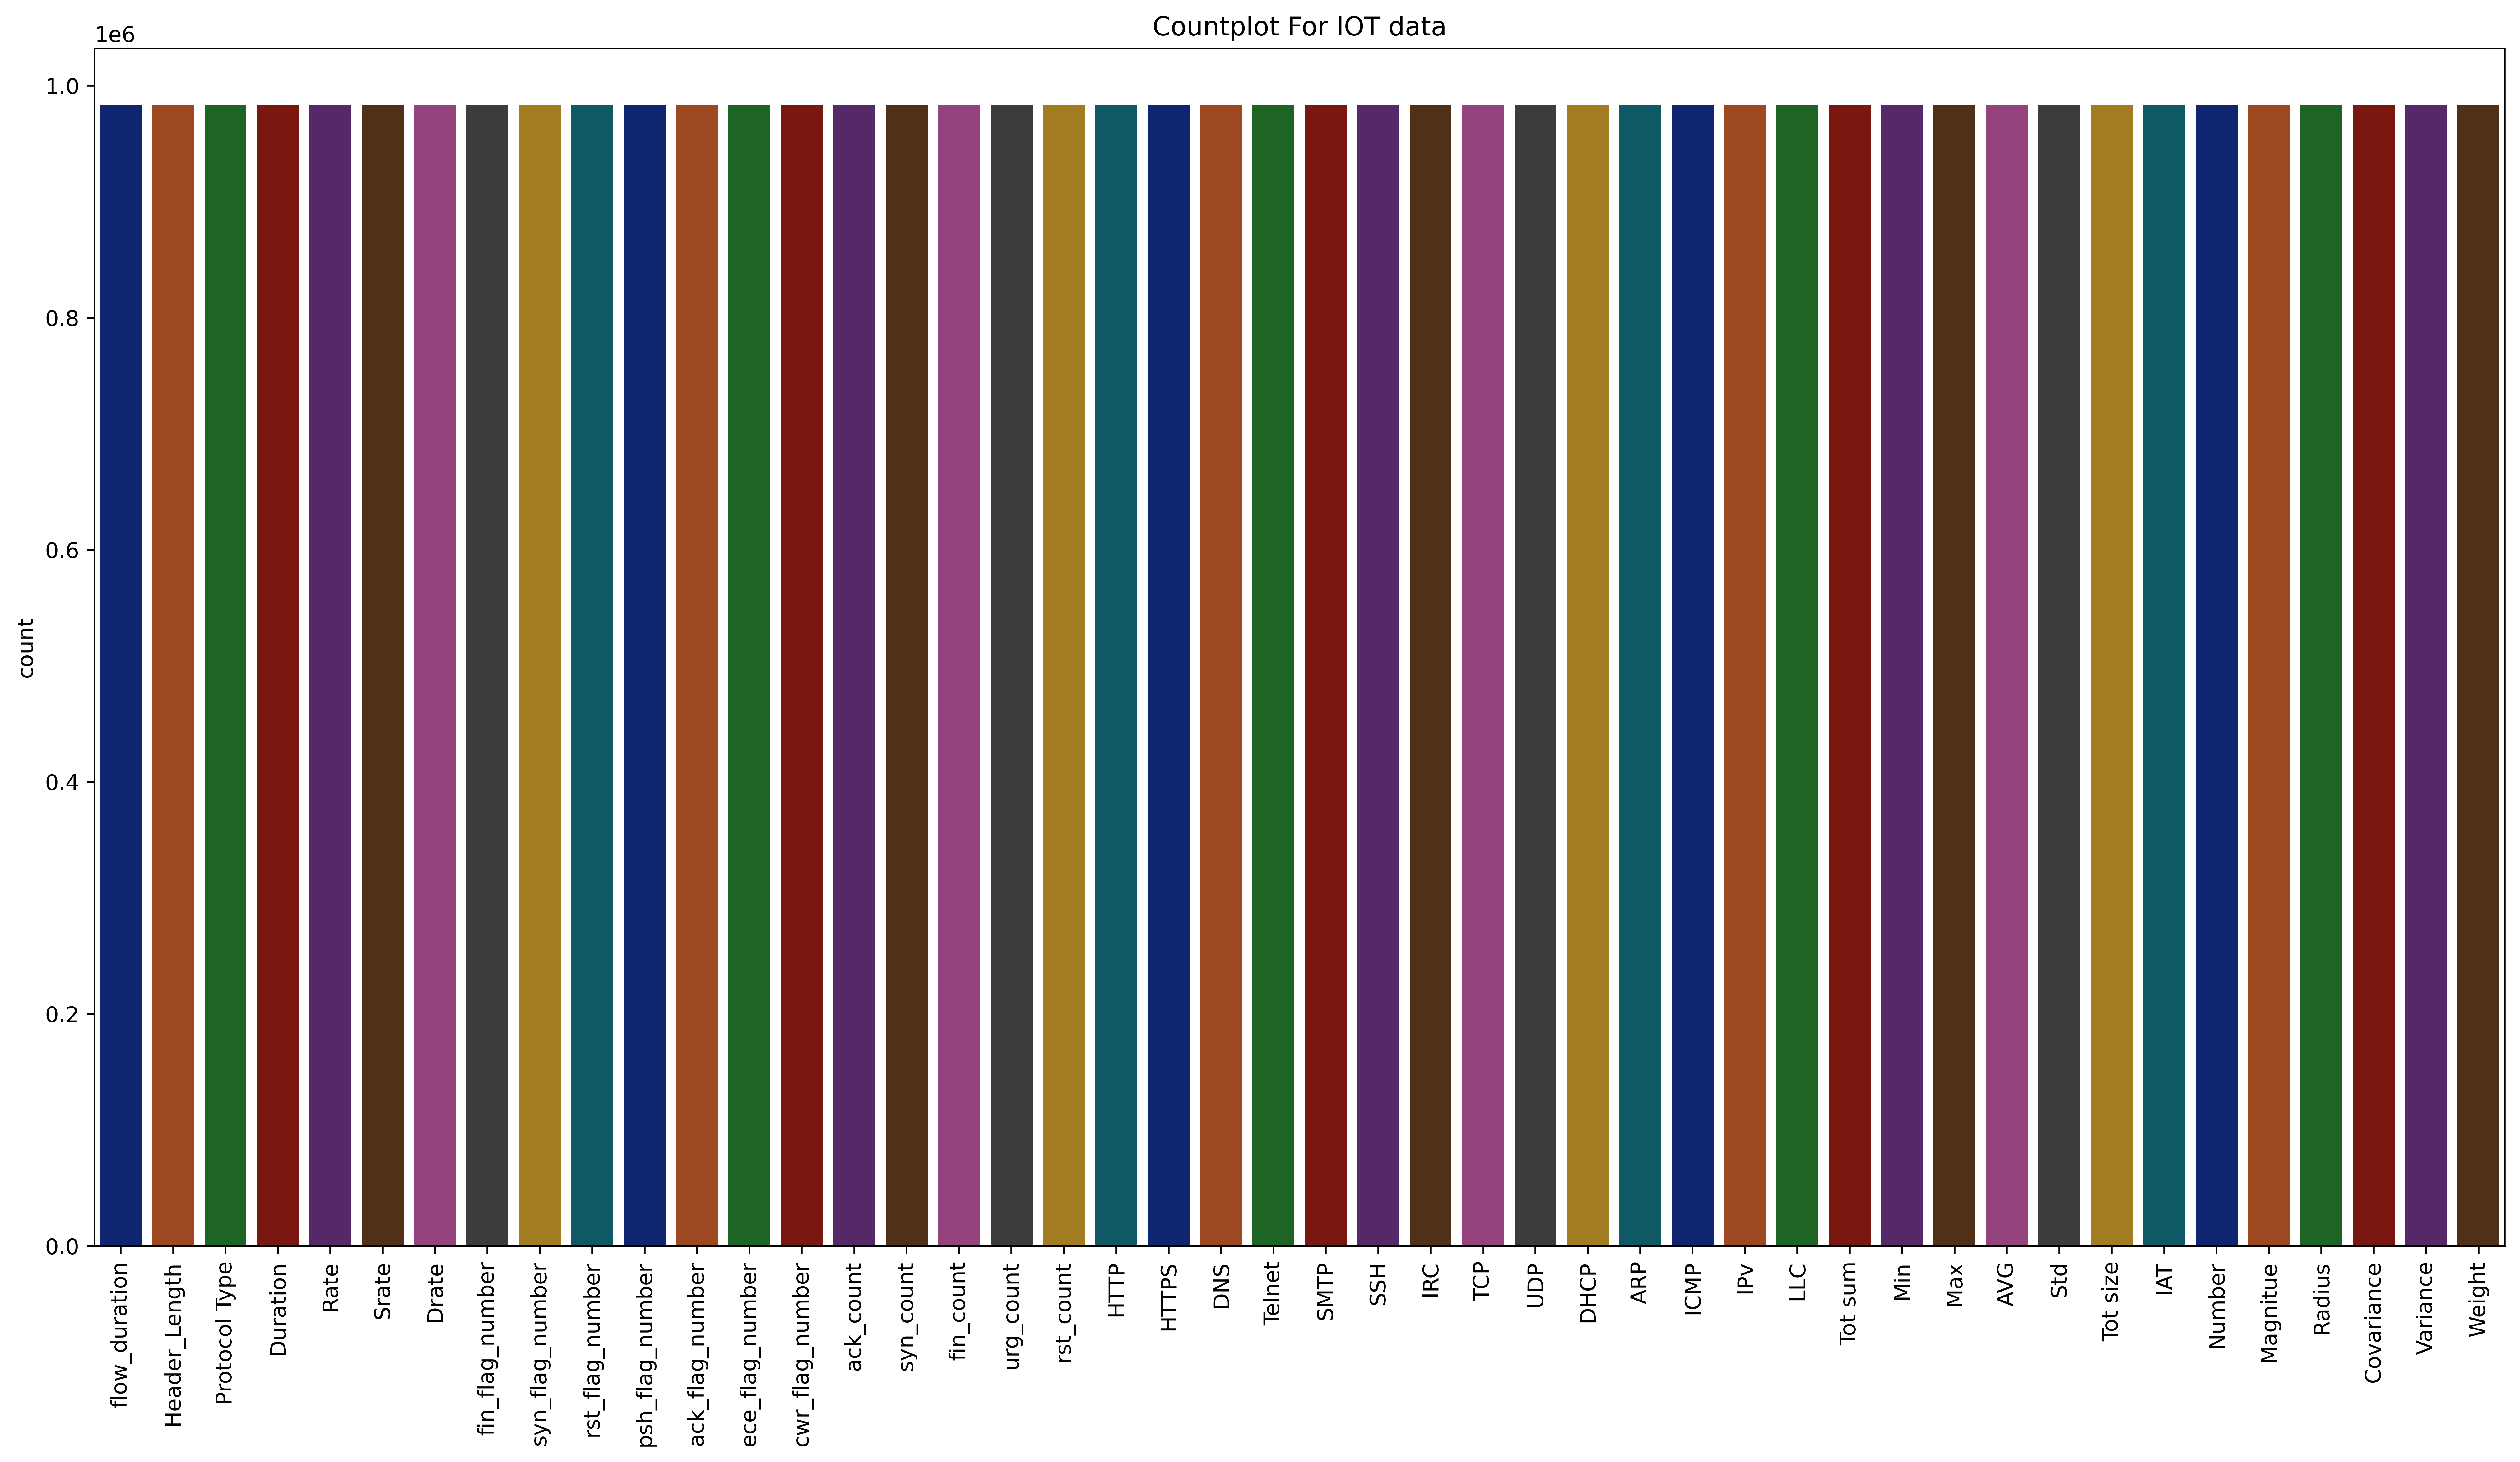

In [18]:
plt.figure(figsize=(20,10),dpi=500)
plt.xticks(rotation=90)
plt.title("Countplot For IOT data")
sns.countplot(df,palette='dark');

<Axes: xlabel='Rate', ylabel='Duration'>

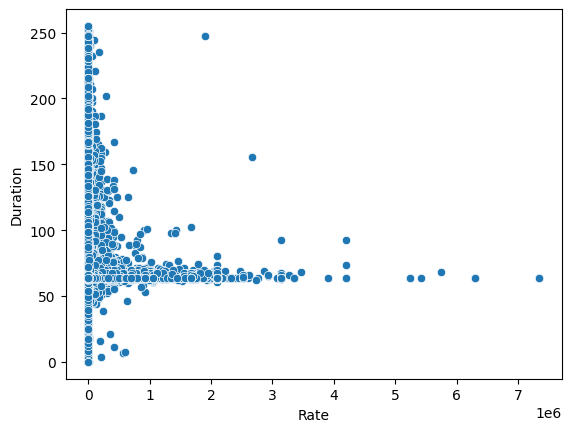

In [23]:
sns.scatterplot(df,x='Rate',y='Duration')

### Model Building

# **DECISION TREE**

In [11]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.model_selection import GridSearchCV

In [12]:
label_encoder = preprocessing.LabelEncoder() 
X = df.drop("label",axis=1)
y = df['label']

df['label']= label_encoder.fit_transform(df['label']) 

df['label'].unique() 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)

In [13]:
# Tham số tuning cho Decision Tree
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10]
}

# Tạo GridSearchCV cho Decision Tree
grid_search_dt = GridSearchCV(
    estimator=DecisionTreeClassifier(class_weight='balanced', random_state=42),
    param_grid=param_grid_dt,
    scoring='f1_macro',
    cv=5,
    n_jobs=-1,
    verbose=3,
    return_train_score=True
)

# Huấn luyện
grid_search_dt.fit(X_train, y_train)

# In kết quả tốt nhất
print("Best parameters for Decision Tree:", grid_search_dt.best_params_)
print("Best cross-validation score for Decision Tree (macro F1):", grid_search_dt.best_score_)

# Lấy mô hình tốt nhất
best_dt = grid_search_dt.best_estimator_

# Dự đoán và đánh giá trên tập test
y_pred_dt = best_dt.predict(X_test)
print("\nClassification report for Decision Tree:")
print(classification_report(y_test, y_pred_dt, digits=5))

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 10}
Best cross-validation score for Decision Tree (macro F1): 0.991107725415341

Classification report for Decision Tree:
                         precision    recall  f1-score   support

          BenignTraffic    0.90987   0.93013   0.91989      4895
        DDoS-ICMP_Flood    0.99996   0.99989   0.99993     27458
      DDoS-PSHACK_Flood    0.99994   1.00000   0.99997     16783
       DDoS-RSTFINFlood    0.99968   0.99987   0.99978     15688
         DDoS-SYN_Flood    0.99994   0.99930   0.99962     17238
DDoS-SynonymousIP_Flood    0.99943   0.99994   0.99968     15799
         DDoS-TCP_Flood    0.99984   0.99978   0.99981     18406
         DDoS-UDP_Flood    0.99975   0.99971   0.99973     24241
          DoS-SYN_Flood    0.99944   0.99977   0.99961      8878
          DoS-TCP_Flood    0.99983   0.99948   0.99965     11498


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Lấy DataFrame từ GridSearch
results_df = pd.DataFrame(grid_search_dt.cv_results_)

# Thêm các cột riêng từ params để dễ phân tích
results_df['criterion'] = results_df['params'].apply(lambda x: x['criterion'])
results_df['max_depth'] = results_df['params'].apply(lambda x: x['max_depth'])
results_df['min_samples_split'] = results_df['params'].apply(lambda x: x['min_samples_split'])
results_df['mean_test_score'] = results_df['mean_test_score'].astype(float)

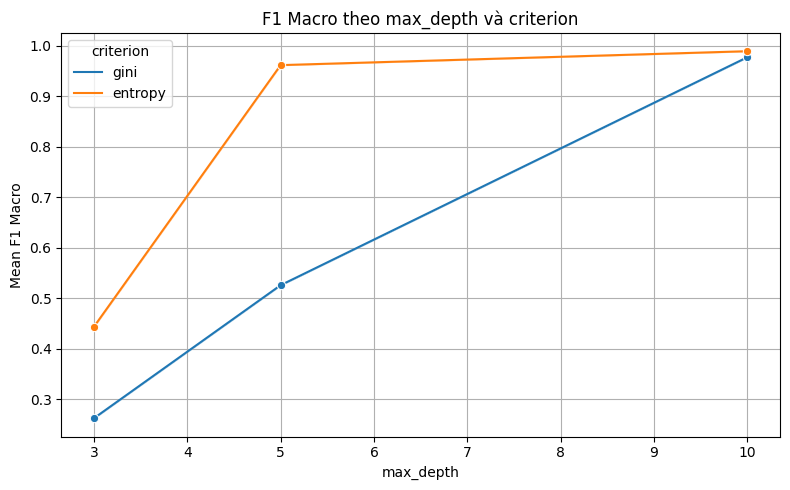

In [15]:
# 1. Biểu đồ Mean Test Score theo max_depth và criterion
plt.figure(figsize=(8, 5))
sns.lineplot(data=results_df, x='max_depth', y='mean_test_score', hue='criterion', marker='o')
plt.title('F1 Macro theo max_depth và criterion')
plt.ylabel('Mean F1 Macro')
plt.xlabel('max_depth')
plt.grid(True)
plt.tight_layout()
plt.show()

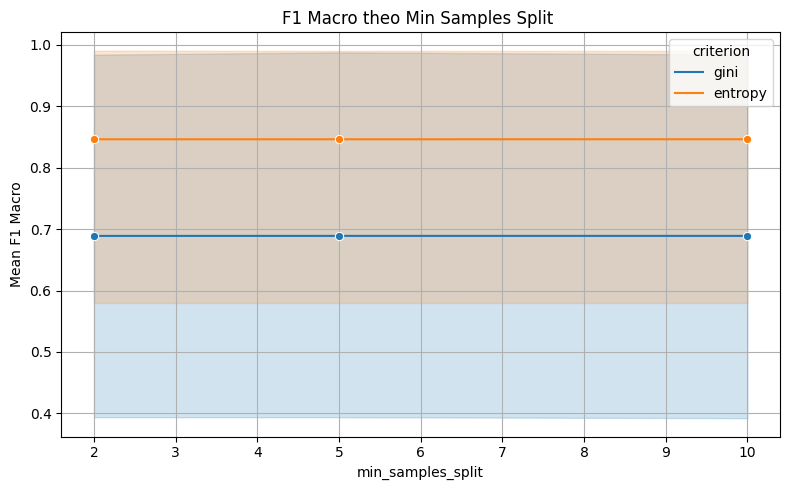

In [16]:
# 2. Biểu đồ Mean Test Score theo min_samples_split và criterion
plt.figure(figsize=(8, 5))
sns.lineplot(data=results_df, x='min_samples_split', y='mean_test_score', hue='criterion', marker='o')
plt.title('F1 Macro theo Min Samples Split ')
plt.ylabel('Mean F1 Macro')
plt.xlabel('min_samples_split')
plt.grid(True)
plt.tight_layout()
plt.show()

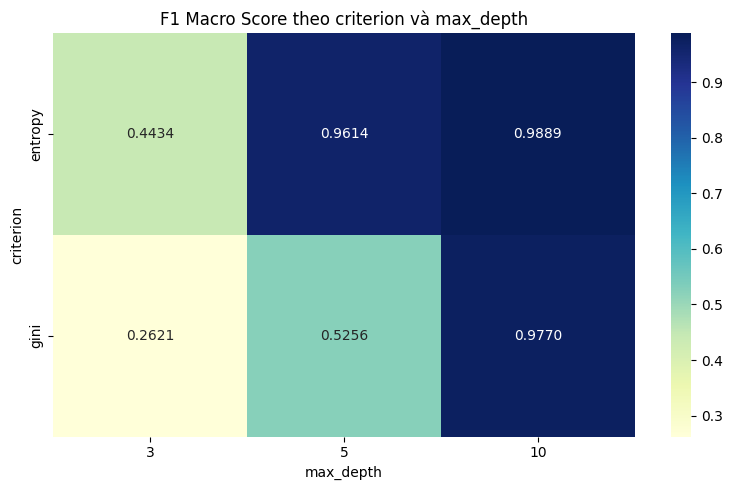

In [17]:
# Tính trung bình F1 Macro theo max_depth và criterion
heatmap_df = results_df.groupby(['param_criterion', 'param_max_depth'])['mean_test_score'].mean().unstack()

# Biểu đồ heatmap cho Mean Test Score theo min_samples_split và criterion
plt.figure(figsize=(8, 5))
sns.heatmap(heatmap_df, annot=True, fmt=".4f", cmap='YlGnBu')

plt.title('F1 Macro Score theo criterion và max_depth')
plt.xlabel('max_depth')
plt.ylabel('criterion')
plt.tight_layout()
plt.show()

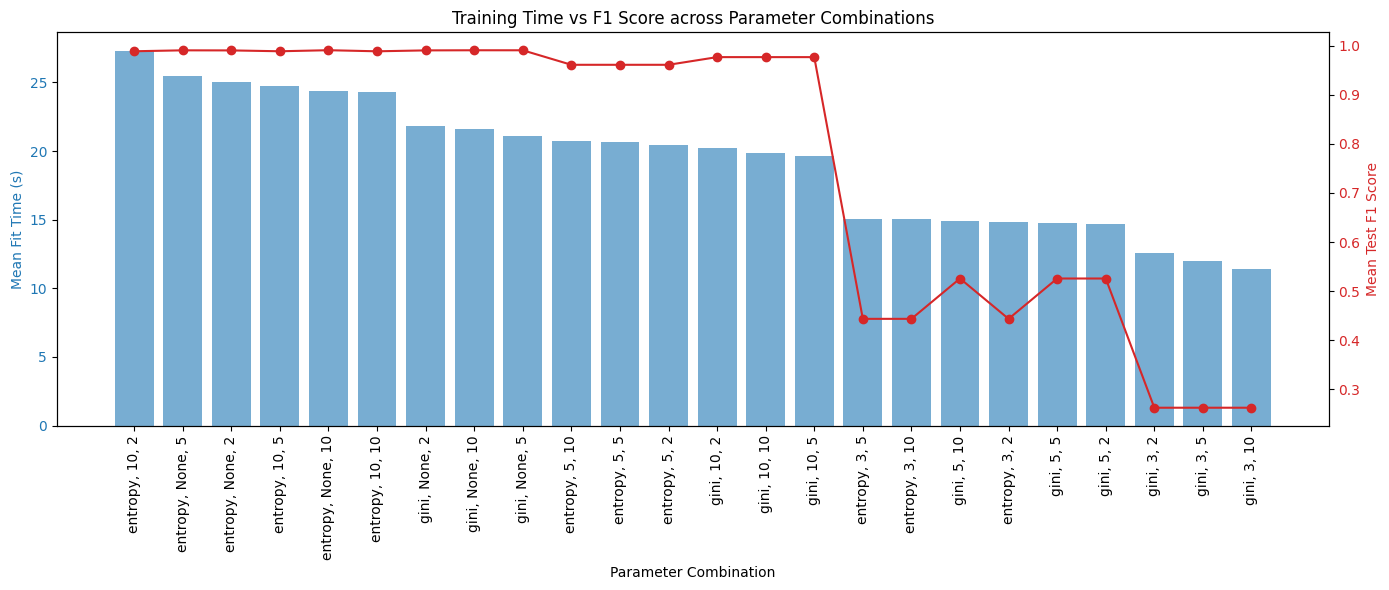

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Giả sử bạn đã có results_df từ grid_search.cv_results_
results_df = pd.DataFrame(grid_search_dt.cv_results_)

# Tạo cột chuỗi tham số
param_cols = [col for col in results_df.columns if col.startswith('param_')]
results_df['param_combo'] = results_df[param_cols].astype(str).agg(', '.join, axis=1)

# Sắp xếp theo thời gian
results_sorted = results_df.sort_values(by='mean_fit_time', ascending=False)

# Vẽ biểu đồ hai trục Y
fig, ax1 = plt.subplots(figsize=(14, 6))

# Trục Y trái: Thời gian huấn luyện
color = 'tab:blue'
ax1.set_xlabel('Parameter Combination')
ax1.set_ylabel('Mean Fit Time (s)', color=color)
ax1.bar(results_sorted['param_combo'], results_sorted['mean_fit_time'], color=color, alpha=0.6, label='Fit Time')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticklabels(results_sorted['param_combo'], rotation=90, ha='center')

# Trục Y phải: F1 macro
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Mean Test F1 Score', color=color)
ax2.plot(results_sorted['param_combo'], results_sorted['mean_test_score'], color=color, marker='o', label='F1 Score')
ax2.tick_params(axis='y', labelcolor=color)

# Tiêu đề và căn chỉnh
plt.title('Training Time vs F1 Score across Parameter Combinations')
fig.tight_layout()
plt.show()

In [40]:
# Khởi tạo mô hình với tham số đã tối ưu
dt_model = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=None,
    min_samples_split=10,
    class_weight='balanced',
    random_state=42  # thêm random_state để kết quả có thể tái lập
)

# Huấn luyện mô hình
dt_model.fit(X_train, y_train)
pred = dt_model.predict(X_test)
dt_report = classification_report(y_test, pred, digits=5)
print(dt_report)

              precision    recall  f1-score   support

           0    0.90987   0.93013   0.91989      4895
           1    0.99996   0.99989   0.99993     27458
           2    0.99994   1.00000   0.99997     16783
           3    0.99968   0.99987   0.99978     15688
           4    0.99994   0.99930   0.99962     17238
           5    0.99943   0.99994   0.99968     15799
           6    0.99984   0.99978   0.99981     18406
           7    0.99975   0.99971   0.99973     24241
           8    0.99944   0.99977   0.99961      8878
           9    0.99983   0.99948   0.99965     11498
          10    0.99946   0.99933   0.99939     14828
          11    0.99931   0.99908   0.99920      4363
          12    0.99827   0.99901   0.99864      4033
          13    0.97062   0.96247   0.96653     12496

    accuracy                        0.99560    196604
   macro avg    0.99110   0.99198   0.99153    196604
weighted avg    0.99563   0.99560   0.99561    196604



# **RANDOM FOREST**

In [14]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.model_selection import GridSearchCV

In [15]:
label_encoder = preprocessing.LabelEncoder() 
X = df.drop("label",axis=1)
y = df['label']

df['label']= label_encoder.fit_transform(df['label']) 

df['label'].unique() 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)

In [31]:
from sklearn.metrics import f1_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Tham số cần tuning
param_grid_rf = {
    'n_estimators': [50, 100, 200],  # Số lượng cây trong rừng
    'max_depth': [10, None],       # Độ sâu tối đa của cây
    'min_samples_split': [2, 10],     # Số lượng mẫu tối thiểu để chia nút
    'min_samples_leaf': [1, 5],       # Số lượng mẫu tối thiểu tại mỗi lá
    'max_features': ['sqrt', 'log2'],
}

# Tạo mô hình GridSearch
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(class_weight='balanced', random_state=42),
    param_grid=param_grid_rf,
    scoring='f1_macro',
    cv=3,
    verbose=3,
    n_jobs=-1
)

# Train
grid_search.fit(X_train, y_train)

# In kết quả
print("Best parameters for Random Forest:", grid_search.best_params_)
print("Best cross-validation score for RF (macro F1):", grid_search.best_score_)

# Đánh giá trên tập test
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Classification report - Random Forest:")
print(classification_report(y_test, y_pred, digits=6))

Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.973 total time= 2.9min
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.976 total time= 5.6min
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.966 total time= 2.8min
[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=50;, score=0.971 total time= 1.4min
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=50;, score=0.968 total time= 1.4min
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=50;, score=0.973 total time= 1.4min
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=100;, score=0.978 

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Bước 1: Chuẩn bị dữ liệu
results = pd.DataFrame(grid_search.cv_results_)
df = results[[
    'mean_test_score',
    'param_n_estimators',
    'param_max_depth',
    'param_min_samples_split',
    'param_min_samples_leaf'
]].copy()

# Xử lý giá trị None
df['param_max_depth'] = df['param_max_depth'].apply(lambda x: -1 if x is None else int(x))
df.columns = [col.replace("param_", "") for col in df.columns]

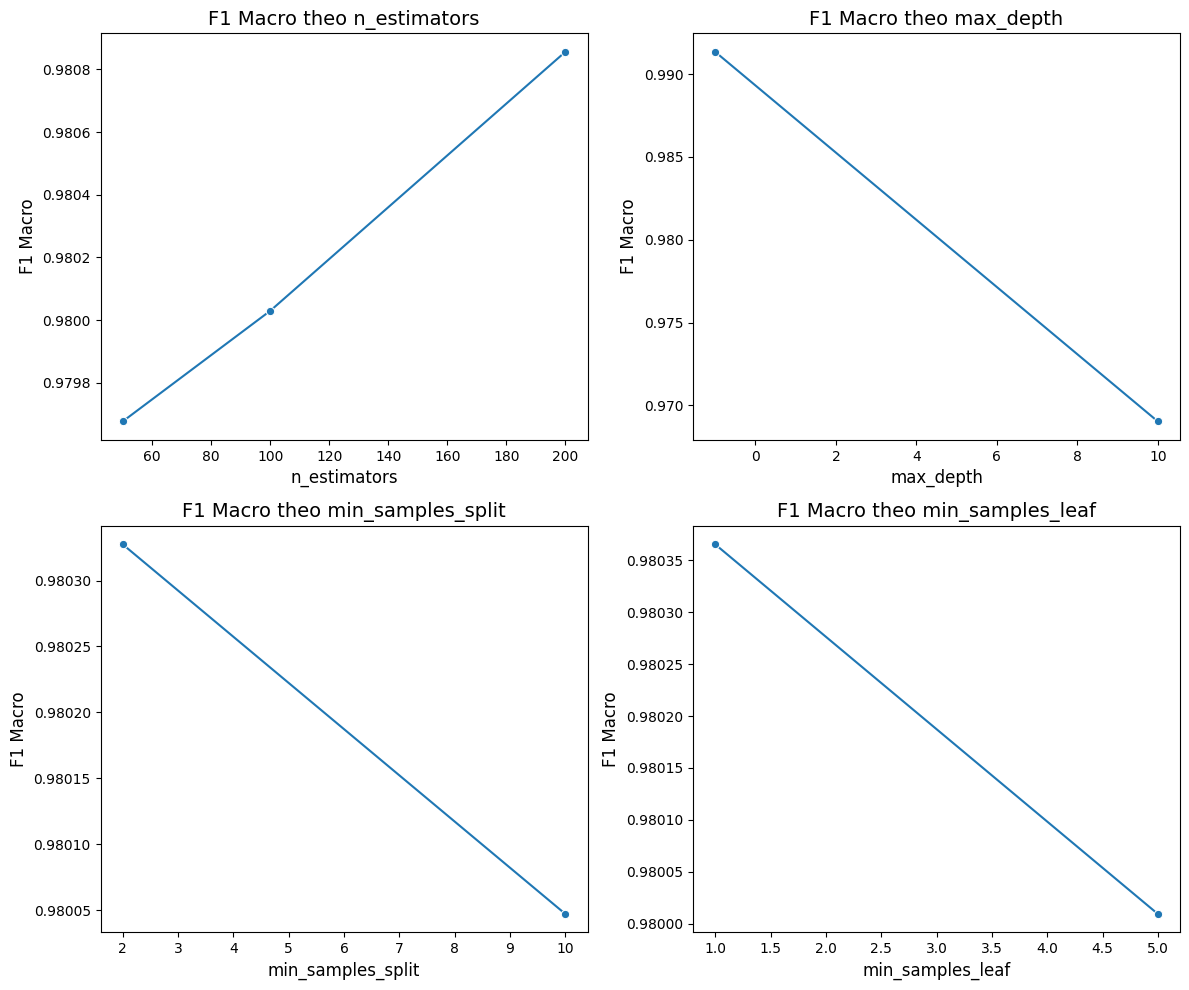

In [36]:
plt.figure(figsize=(12, 10))

# 1. F1 Macro theo n_estimators
plt.subplot(2, 2, 1)
sns.lineplot(
    data=df.groupby('n_estimators')['mean_test_score'].mean().reset_index(),
    x='n_estimators', y='mean_test_score', marker='o'
)
plt.title('F1 Macro theo n_estimators', fontsize=14)
plt.xlabel('n_estimators', fontsize=12)
plt.ylabel('F1 Macro', fontsize=12)

# 2. F1 Macro theo max_depth
plt.subplot(2, 2, 2)
sns.lineplot(
    data=df.groupby('max_depth')['mean_test_score'].mean().reset_index(),
    x='max_depth', y='mean_test_score', marker='o'
)
plt.title('F1 Macro theo max_depth', fontsize=14)
plt.xlabel('max_depth', fontsize=12)
plt.ylabel('F1 Macro', fontsize=12)

# 3. F1 Macro theo min_samples_split
plt.subplot(2, 2, 3)
sns.lineplot(
    data=df.groupby('min_samples_split')['mean_test_score'].mean().reset_index(),
    x='min_samples_split', y='mean_test_score', marker='o'
)
plt.title('F1 Macro theo min_samples_split', fontsize=14)
plt.xlabel('min_samples_split', fontsize=12)
plt.ylabel('F1 Macro', fontsize=12)

# 4. F1 Macro theo min_samples_leaf
plt.subplot(2, 2, 4)
sns.lineplot(
    data=df.groupby('min_samples_leaf')['mean_test_score'].mean().reset_index(),
    x='min_samples_leaf', y='mean_test_score', marker='o'
)
plt.title('F1 Macro theo min_samples_leaf', fontsize=14)
plt.xlabel('min_samples_leaf', fontsize=12)
plt.ylabel('F1 Macro', fontsize=12)

plt.tight_layout()
plt.show()


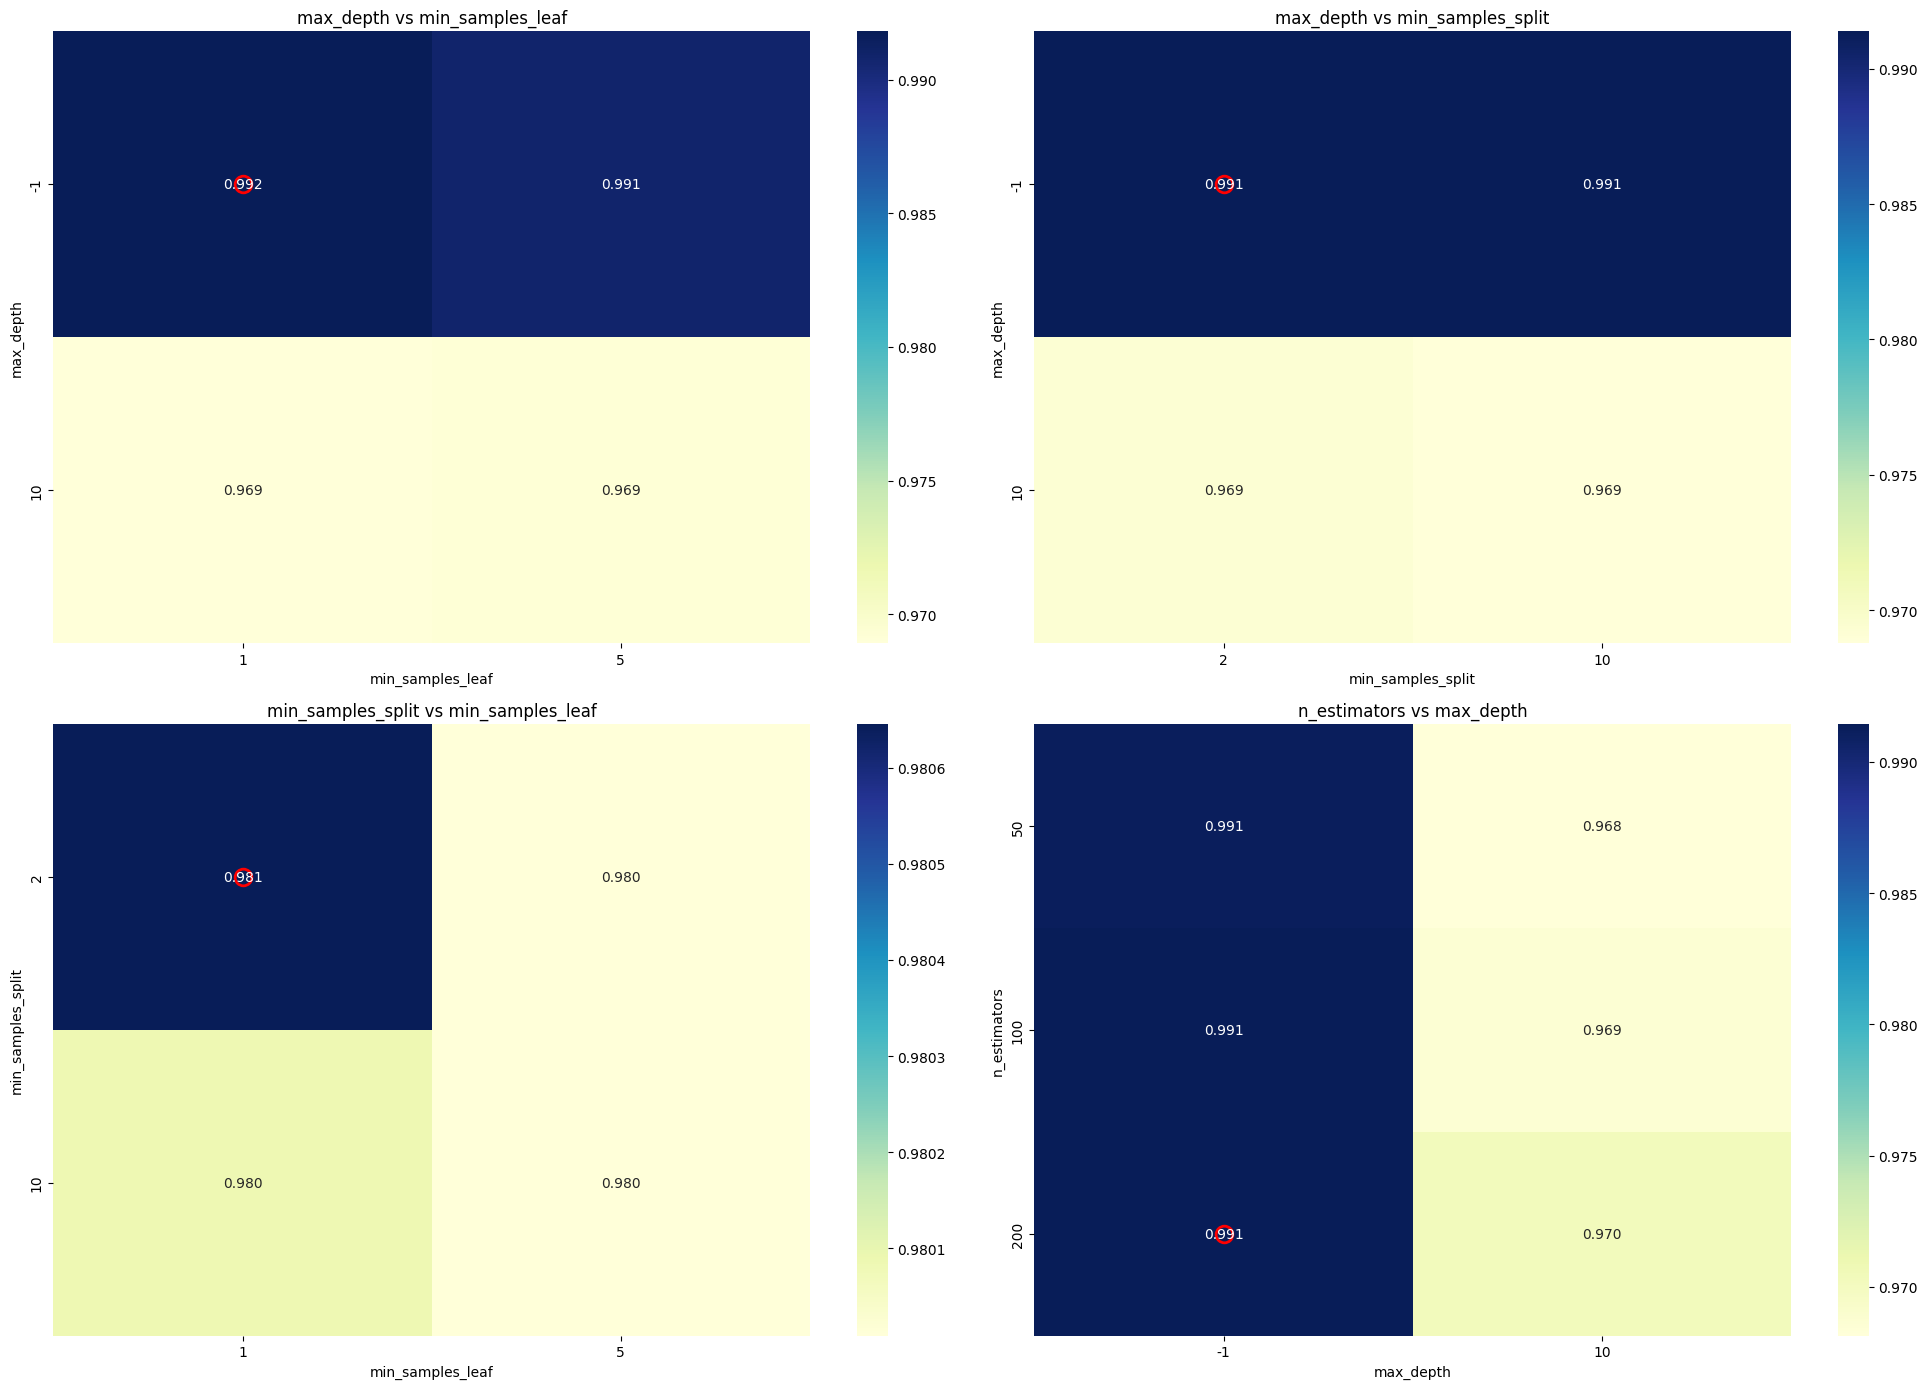

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Hàm vẽ heatmap với điểm tốt nhất
def plot_heatmap_with_best(pivot_table, title, ax):
    sns.heatmap(pivot_table, annot=True, fmt=".3f", cmap="YlGnBu", ax=ax)
    ax.set_title(title)

    # Tìm điểm tốt nhất
    max_val = pivot_table.max().max()
    max_coords = np.where(pivot_table == max_val)
    if len(max_coords[0]) > 0:
        y, x = max_coords[0][0], max_coords[1][0]
        ax.plot(x + 0.5, y + 0.5, 'o', markersize=12, markerfacecolor='none',
                markeredgecolor='red', markeredgewidth=2)

# Tạo các bảng trục pivot_table
pivot1 = df.pivot_table(index='max_depth', columns='min_samples_leaf',
                        values='mean_test_score', aggfunc='mean')
pivot2 = df.pivot_table(index='max_depth', columns='min_samples_split',
                        values='mean_test_score', aggfunc='mean')
pivot3 = df.pivot_table(index='min_samples_split', columns='min_samples_leaf',
                        values='mean_test_score', aggfunc='mean')
pivot4 = df.pivot_table(index='n_estimators', columns='max_depth',
                        values='mean_test_score', aggfunc='mean')

# Vẽ biểu đồ
fig, axes = plt.subplots(2, 2, figsize=(20, 14))

plot_heatmap_with_best(pivot1, "max_depth vs min_samples_leaf", axes[0, 0])
plot_heatmap_with_best(pivot2, "max_depth vs min_samples_split", axes[0, 1])
plot_heatmap_with_best(pivot3, "min_samples_split vs min_samples_leaf", axes[1, 0])
plot_heatmap_with_best(pivot4, "n_estimators vs max_depth", axes[1, 1])

plt.tight_layout()
plt.show()

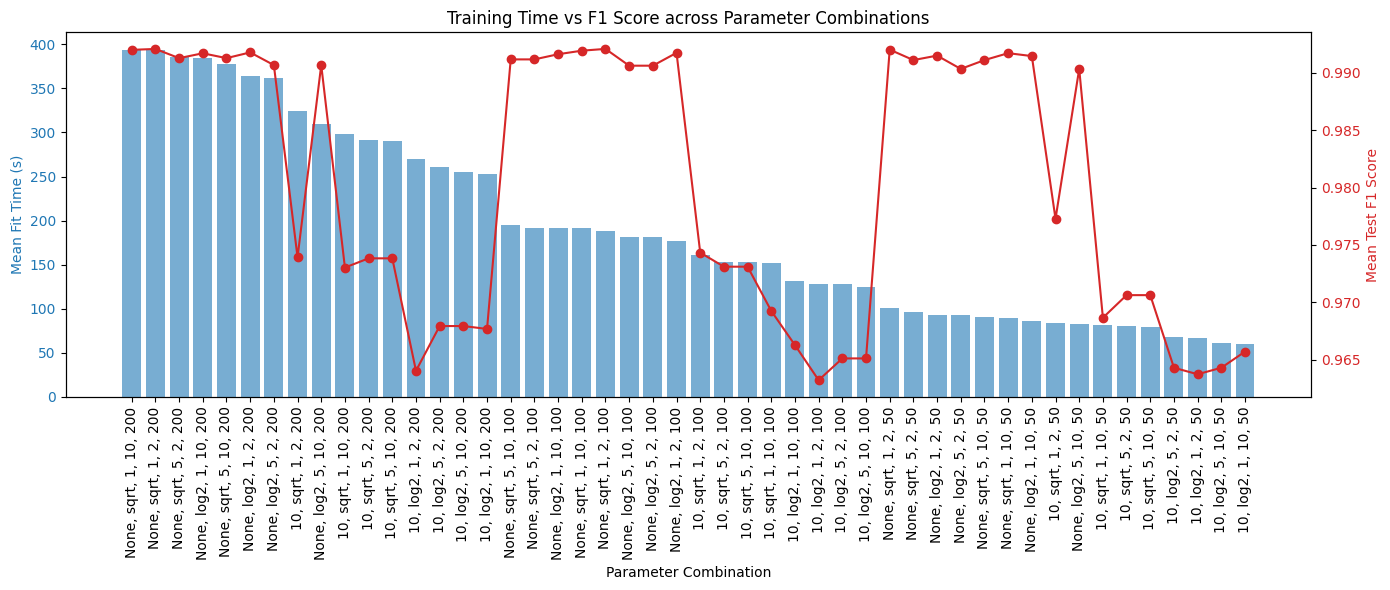

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Giả sử bạn đã có results_df từ grid_search.cv_results_
results_df = pd.DataFrame(grid_search.cv_results_)

# Tạo cột chuỗi tham số
param_cols = [col for col in results_df.columns if col.startswith('param_')]
results_df['param_combo'] = results_df[param_cols].astype(str).agg(', '.join, axis=1)

# Sắp xếp theo thời gian
results_sorted = results_df.sort_values(by='mean_fit_time', ascending=False)

# Vẽ biểu đồ hai trục Y
fig, ax1 = plt.subplots(figsize=(14, 6))

# Trục Y trái: Thời gian huấn luyện
color = 'tab:blue'
ax1.set_xlabel('Parameter Combination')
ax1.set_ylabel('Mean Fit Time (s)', color=color)
ax1.bar(results_sorted['param_combo'], results_sorted['mean_fit_time'], color=color, alpha=0.6, label='Fit Time')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticklabels(results_sorted['param_combo'], rotation=90, ha='center')

# Trục Y phải: F1 macro
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Mean Test F1 Score', color=color)
ax2.plot(results_sorted['param_combo'], results_sorted['mean_test_score'], color=color, marker='o', label='F1 Score')
ax2.tick_params(axis='y', labelcolor=color)

# Tiêu đề và căn chỉnh
plt.title('Training Time vs F1 Score across Parameter Combinations')
fig.tight_layout()
plt.show()

In [16]:
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features = 'sqrt',
    class_weight='balanced',  
    random_state=42,          
    n_jobs=-1                 
)
rf_model.fit(X_train,y_train)
pred = rf_model.predict(X_test)
rf_report = classification_report(y_test, pred, digits=5, output_dict=False)
print(rf_report)

              precision    recall  f1-score   support

           0    0.93656   0.94995   0.94320      4895
           1    0.99985   0.99924   0.99954     27458
           2    1.00000   0.99911   0.99955     16783
           3    0.99994   0.99943   0.99968     15688
           4    0.99977   0.99861   0.99919     17238
           5    0.99937   0.99905   0.99921     15799
           6    0.99973   0.99902   0.99937     18406
           7    0.99942   0.99880   0.99911     24241
           8    0.99944   0.99763   0.99853      8878
           9    0.99991   0.99861   0.99926     11498
          10    0.99926   0.99737   0.99831     14828
          11    0.99931   0.99679   0.99805      4363
          12    0.99950   0.99628   0.99789      4033
          13    0.96635   0.97455   0.97044     12496

    accuracy                        0.99594    196604
   macro avg    0.99274   0.99317   0.99295    196604
weighted avg    0.99598   0.99594   0.99595    196604



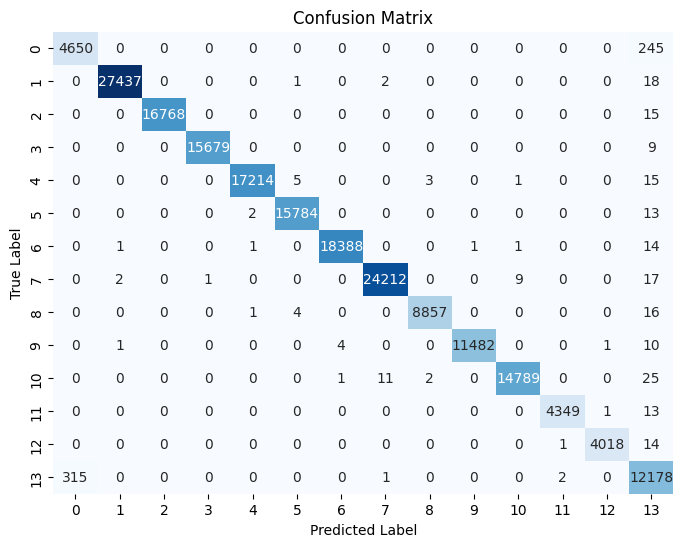

In [21]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, pred)

# Visualize confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

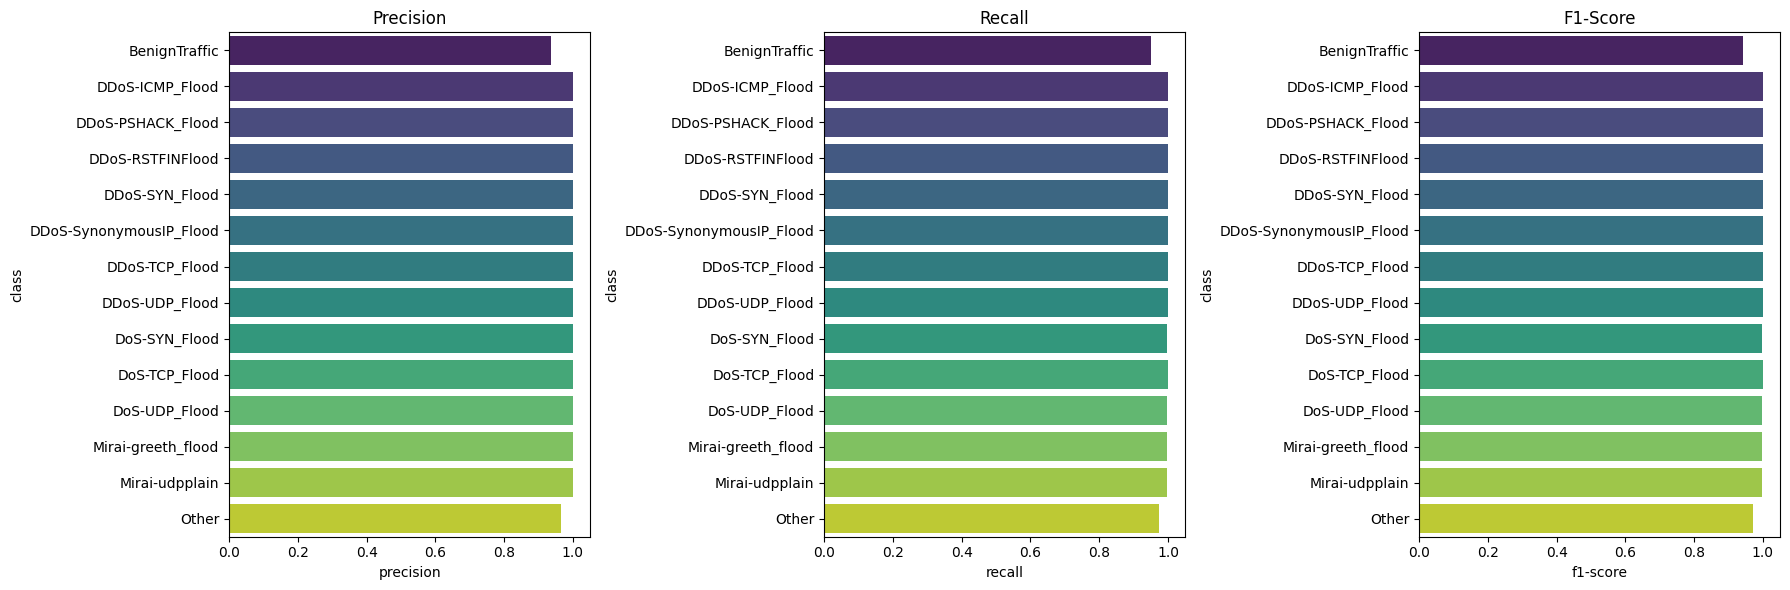

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

report_data = []
for row in rf_report.split('\n')[2:-5]:
    row_data = row.split()
    report_data.append({
        'class': row_data[0],        # tên lớp gốc
        'precision': float(row_data[1]),
        'recall': float(row_data[2]),
        'f1-score': float(row_data[3])
    })

df_report = pd.DataFrame(report_data)

plt.figure(figsize=(18, 6))

# Precision
plt.subplot(1, 3, 1)
sns.barplot(x='precision', y='class', data=df_report, palette='viridis')
plt.title('Precision')

# Recall
plt.subplot(1, 3, 2)
sns.barplot(x='recall', y='class', data=df_report, palette='viridis')
plt.title('Recall')


# F1-Score
plt.subplot(1, 3, 3)
sns.barplot(x='f1-score', y='class', data=df_report, palette='viridis')
plt.title('F1-Score')

plt.tight_layout()
plt.show()

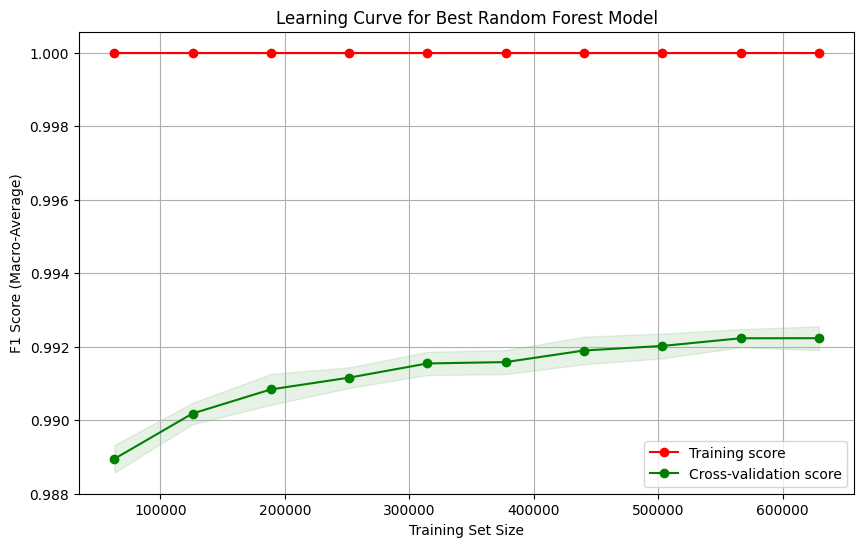

In [42]:
from sklearn.model_selection import learning_curve

# Vẽ Learning Curve cho Best Model
train_sizes, train_scores, validation_scores = learning_curve(
    estimator = rf_model,
    X = X_train,
    y = y_train,
    train_sizes = np.linspace(0.1, 1.0, 10),
    cv = 5,
    scoring = 'f1_macro',
    n_jobs = -1
)

# Trung bình và độ lệch chuẩn
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
validation_mean = np.mean(validation_scores, axis=1)
validation_std = np.std(validation_scores, axis=1)

# Vẽ
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, validation_mean, 'o-', color="g", label="Cross-validation score")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="r", alpha=0.1)
plt.fill_between(train_sizes, validation_mean - validation_std, validation_mean + validation_std, color="g", alpha=0.1)
plt.title('Learning Curve for Best Random Forest Model')
plt.xlabel('Training Set Size')
plt.ylabel('F1 Score (Macro-Average)')
plt.legend(loc="best")
plt.grid()
plt.show()

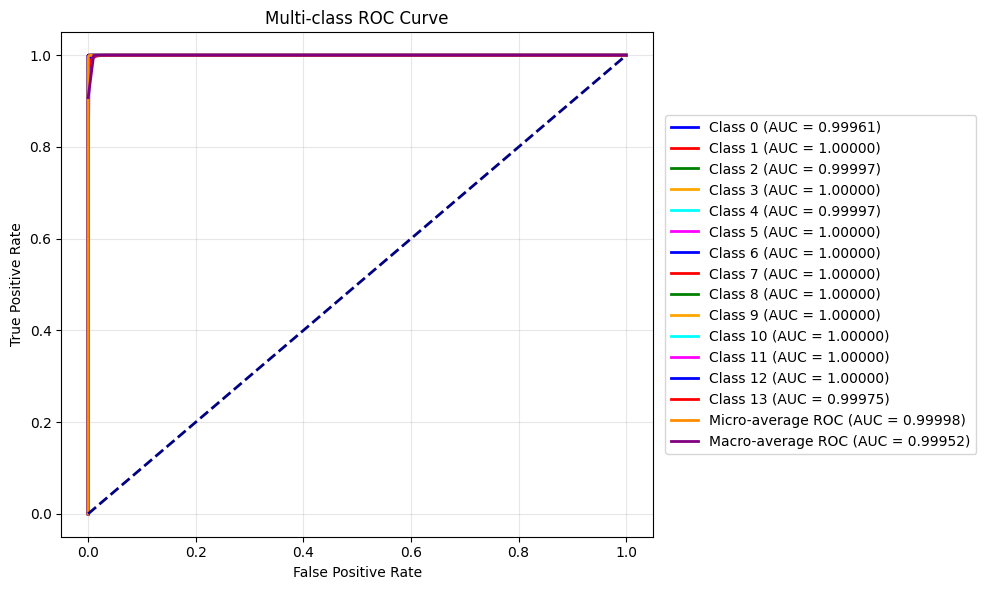

In [62]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Binarize the output labels
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

# Predict probabilities for all classes
y_score = rf_model.predict_proba(X_test)

# Dictionary to store FPR, TPR, and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Create plot
plt.figure(figsize=(10, 6))
colors = ['blue', 'red', 'green', 'orange', 'cyan', 'magenta']

# Plot ROC curve for each class
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i % len(colors)],
             lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.5f})')

# Compute Micro-Average ROC
fpr_micro, tpr_micro, _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)
plt.plot(fpr_micro, tpr_micro, color='darkorange', lw=2,
         label=f'Micro-average ROC (AUC = {roc_auc_micro:.5f})')

# Compute Macro-Average ROC
mean_fpr = np.linspace(0, 1, 100)
mean_tpr = np.zeros_like(mean_fpr)

for i in range(n_classes):
    mean_tpr += np.interp(mean_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes
roc_auc_macro = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='purple', lw=2,
         label=f'Macro-average ROC (AUC = {roc_auc_macro:.5f})')

# Diagonal line (random guess)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Plot formatting
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC Curve')
plt.legend(loc='center left', bbox_to_anchor=(1.02, 0.5), borderaxespad=0.)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

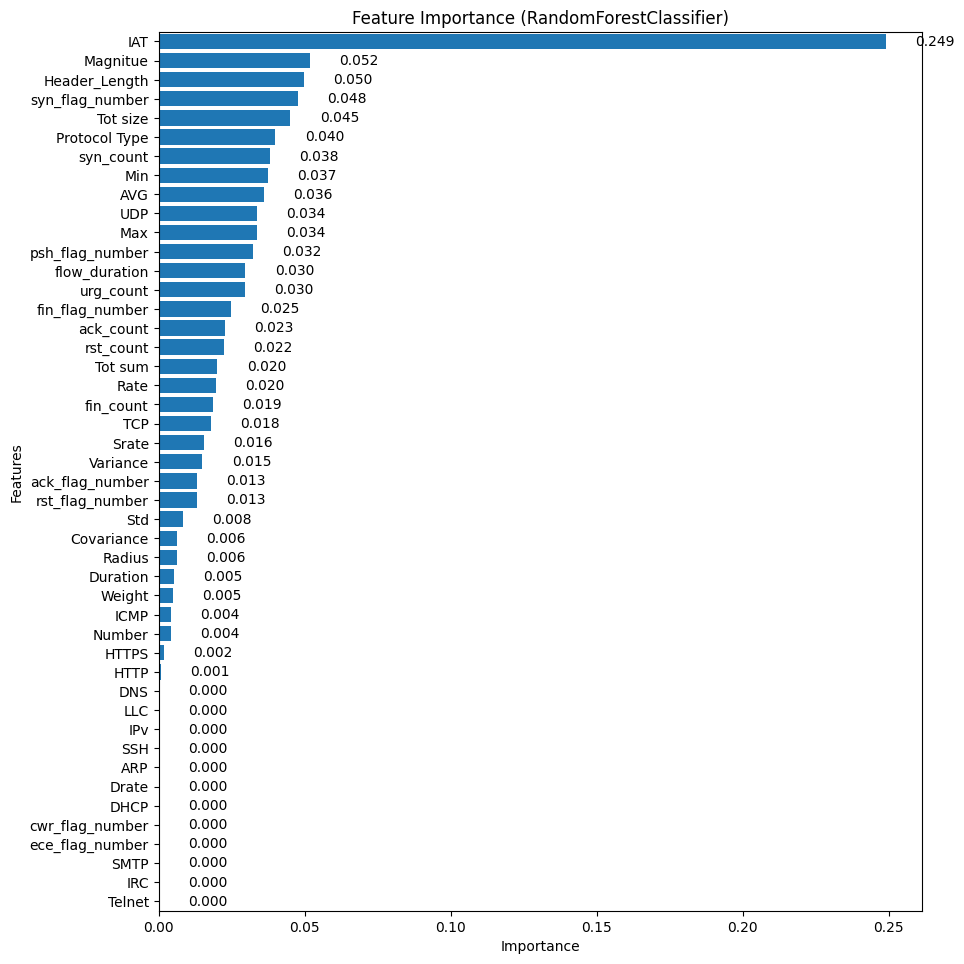

In [63]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier

# Lấy tầm quan trọng của các đặc trưng từ mô hình
importances = rf_model.feature_importances_
feature_names = X_train.columns  # Giả sử X_train là DataFrame

# Sắp xếp theo tầm quan trọng giảm dần
sorted_idx = np.argsort(importances)[::-1]
feature_names = [feature_names[i] for i in sorted_idx]
importances = [importances[i] for i in sorted_idx]

# Vẽ biểu đồ cột nằm ngang
plt.figure(figsize=(10, 10))  # Chiều cao dựa trên số lượng đặc trưng
bars = plt.barh(range(len(feature_names)), importances, align='center')

plt.yticks(ticks=range(len(feature_names)), labels=feature_names)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance (RandomForestClassifier)')

plt.ylim(-0.5, len(feature_names) - 0.5)

# Thêm số liệu ở cuối thanh
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width + 0.01, bar.get_y() + bar.get_height()/2,
             f'{importances[i]:.3f}', va='center')

plt.gca().invert_yaxis()  # Quan trọng: để feature quan trọng nhất ở trên
plt.tight_layout(pad=2.0)
plt.show()

# **LIGHTGBM**

In [14]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, make_scorer
import matplotlib.pyplot as plt
import seaborn as sns
import time
from lightgbm import early_stopping, log_evaluation
from tabulate import tabulate
from sklearn import preprocessing

In [15]:
label_encoder = preprocessing.LabelEncoder() 
X = df.drop("label",axis=1)
y = df['label']

df['label']= label_encoder.fit_transform(df['label']) 

df['label'].unique() 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)

In [17]:
# --- Tham số cần tuning (rút gọn) ---
param_grid_lgb = {
    'learning_rate': [0.05, 0.1],
    'num_leaves': [31, 64],
    'max_depth': [10, 20],
}

# --- Tạo mô hình LightGBM ---
lgb_model = lgb.LGBMClassifier(
    objective='multiclass',
    num_class=len(set(y_train)),
    metric='multi_logloss',
    class_weight='balanced',
    verbose=-1, 
    random_state=42,
    force_row_wise=True
)

# --- Sử dụng f1_macro để đánh giá ---
scorer = make_scorer(f1_score, average='macro')

# --- GridSearchCV --- 
grid_search_lgb = GridSearchCV(
    estimator=lgb_model,
    param_grid=param_grid_lgb,
    scoring=scorer,
    cv=5,
    verbose=3,
    n_jobs=-1,
    return_train_score=True
)

# --- Huấn luyện ---
grid_search_lgb.fit(X_train, y_train)

# In kết quả
print("Best parameters for LightGBM:", grid_search_lgb.best_params_)
print("Best cross-validation score for LightGBM (macro F1):", grid_search_lgb.best_score_)

# Đánh giá trên tập test
best_model = grid_search_lgb.best_estimator_
y_pred = best_model.predict(X_test)
print("Classification report - LightGBM:")
print(classification_report(y_test, y_pred, digits=6))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 2/5] END learning_rate=0.05, max_depth=10, num_leaves=31;, score=(train=0.993, test=0.991) total time= 5.2min
[CV 2/5] END learning_rate=0.05, max_depth=10, num_leaves=64;, score=(train=0.994, test=0.992) total time=10.5min
[CV 2/5] END learning_rate=0.05, max_depth=20, num_leaves=31;, score=(train=0.993, test=0.992) total time= 8.1min
[CV 5/5] END learning_rate=0.05, max_depth=20, num_leaves=31;, score=(train=0.994, test=0.992) total time= 7.9min
[CV 4/5] END learning_rate=0.05, max_depth=20, num_leaves=64;, score=(train=0.995, test=0.992) total time=10.1min
[CV 1/5] END learning_rate=0.1, max_depth=10, num_leaves=31;, score=(train=0.995, test=0.993) total time= 8.5min
[CV 5/5] END learning_rate=0.1, max_depth=10, num_leaves=31;, score=(train=0.996, test=0.992) total time= 8.3min
[CV 4/5] END learning_rate=0.1, max_depth=10, num_leaves=64;, score=(train=0.997, test=0.992) total time=10.6min
[CV 3/5] END learning_rate=0.1,

In [18]:
# Lấy kết quả phù hợp với grid bạn chạy
results_df = pd.DataFrame(grid_search_lgb.cv_results_)
# Lọc cột phù hợp
plot_df = results_df[['param_max_depth', 'param_learning_rate', 'mean_test_score']].copy()
# Chuyển kiểu dữ liệu
plot_df['param_max_depth'] = plot_df['param_max_depth'].astype(str)
plot_df['param_learning_rate'] = plot_df['param_learning_rate'].astype(str)

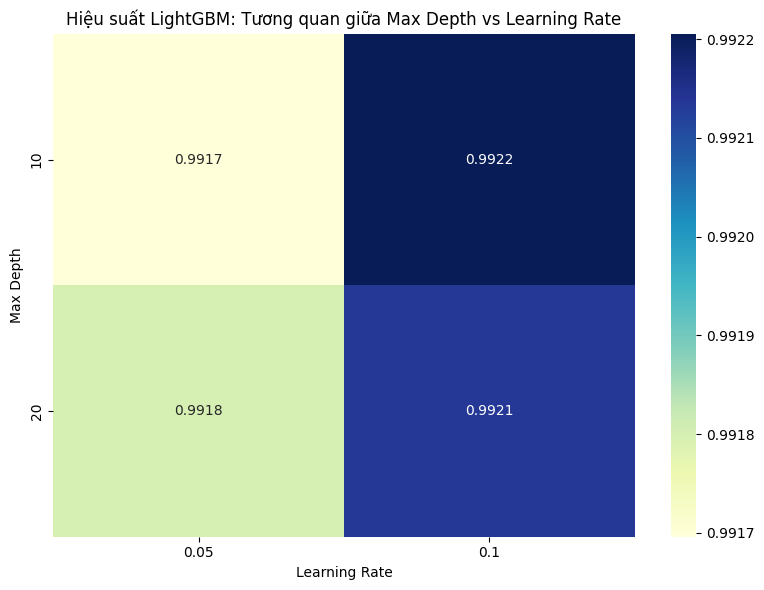

In [19]:
# Lấy trung bình theo từng cặp max_depth và learning_rate
pivot_df = plot_df.groupby(['param_max_depth', 'param_learning_rate'])['mean_test_score'].mean().reset_index()
# Pivot lại để vẽ heatmap
heatmap_data = pivot_df.pivot(index='param_max_depth', columns='param_learning_rate', values='mean_test_score')
# Vẽ heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", fmt=".4f")
plt.title("Hiệu suất LightGBM: Tương quan giữa Max Depth vs Learning Rate")
plt.xlabel("Learning Rate")
plt.ylabel("Max Depth")
plt.tight_layout()
plt.show()

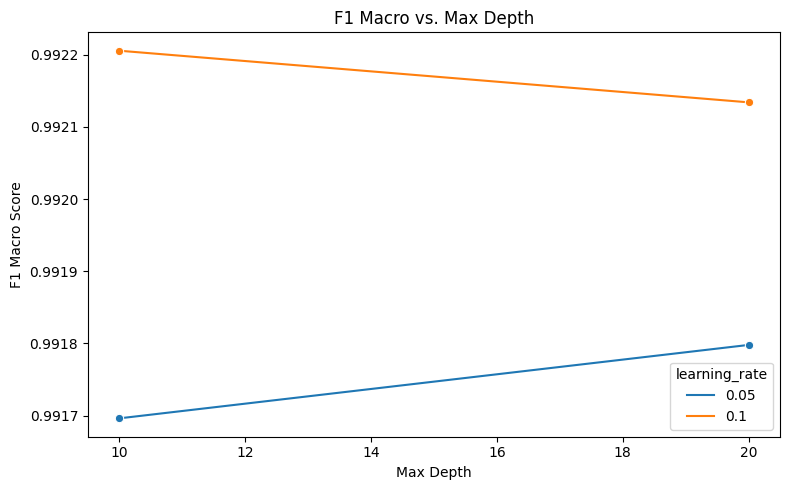

In [20]:
# Lọc chỉ 2 tham số: max_depth và learning_rate
plot_df = results_df[['param_max_depth', 'param_learning_rate', 'mean_test_score']].copy()

# Chuyển kiểu dữ liệu
plot_df['param_max_depth'] = plot_df['param_max_depth'].astype(int)
plot_df['param_learning_rate'] = plot_df['param_learning_rate'].astype(str)

# Vẽ biểu đồ
plt.figure(figsize=(8, 5))
sns.lineplot(
    data=plot_df,
    x='param_max_depth',
    y='mean_test_score',
    hue='param_learning_rate',
    marker='o',
    errorbar=None
)
plt.title("F1 Macro vs. Max Depth")
plt.xlabel("Max Depth")
plt.ylabel("F1 Macro Score")
plt.legend(title="learning_rate")
plt.tight_layout()
plt.show()

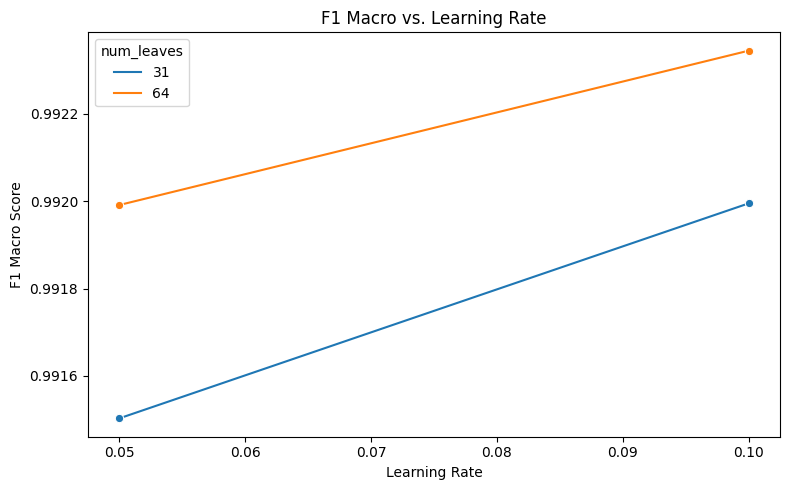

In [21]:
# Lọc dữ liệu cần thiết
plot_df = results_df[['param_learning_rate', 'param_num_leaves', 'mean_test_score']].copy()
plot_df['param_learning_rate'] = plot_df['param_learning_rate'].astype(float)
plot_df['param_num_leaves'] = plot_df['param_num_leaves'].astype(str)
plt.figure(figsize=(8, 5))
sns.lineplot(
    data=plot_df,
    x='param_learning_rate',
    y='mean_test_score',
    hue='param_num_leaves',
    marker='o',
    errorbar=None
)
plt.title("F1 Macro vs. Learning Rate")
plt.xlabel("Learning Rate")
plt.ylabel("F1 Macro Score")
plt.legend(title="num_leaves")
plt.tight_layout()
plt.show()

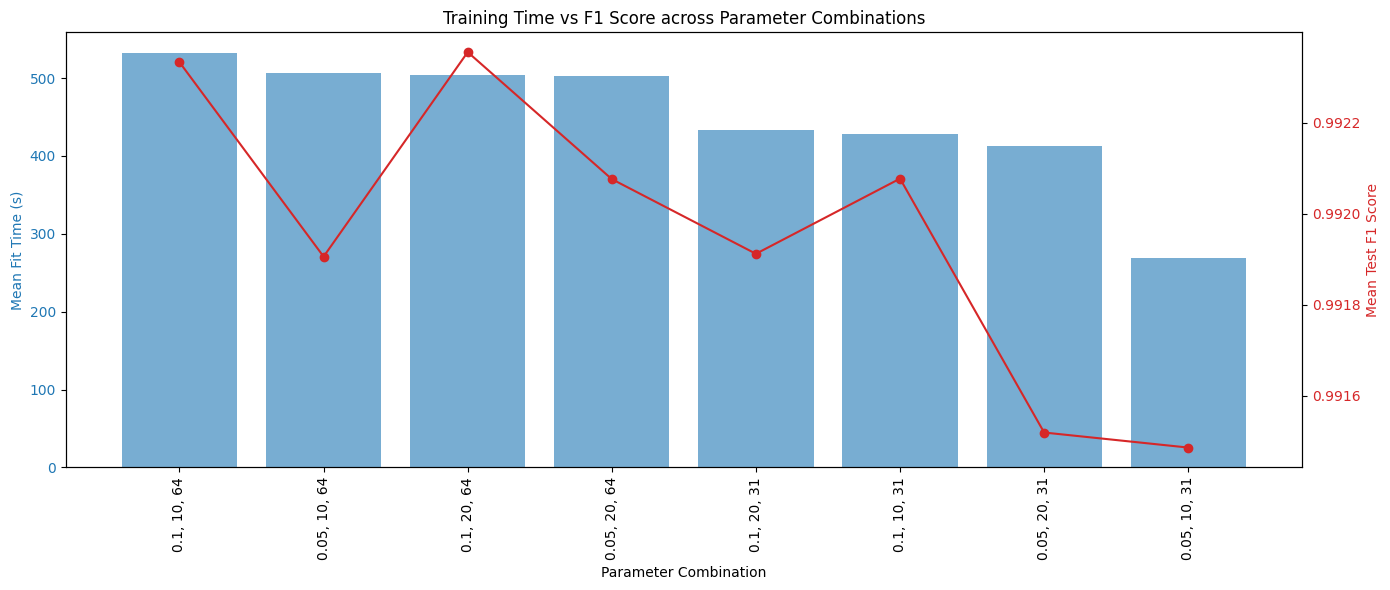

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Giả sử bạn đã có results_df từ grid_search.cv_results_
results_df = pd.DataFrame(grid_search_lgb.cv_results_)

# Tạo cột chuỗi tham số
param_cols = [col for col in results_df.columns if col.startswith('param_')]
results_df['param_combo'] = results_df[param_cols].astype(str).agg(', '.join, axis=1)

# Sắp xếp theo thời gian
results_sorted = results_df.sort_values(by='mean_fit_time', ascending=False)

# Vẽ biểu đồ hai trục Y
fig, ax1 = plt.subplots(figsize=(14, 6))

# Trục Y trái: Thời gian huấn luyện
color = 'tab:blue'
ax1.set_xlabel('Parameter Combination')
ax1.set_ylabel('Mean Fit Time (s)', color=color)
ax1.bar(results_sorted['param_combo'], results_sorted['mean_fit_time'], color=color, alpha=0.6, label='Fit Time')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticklabels(results_sorted['param_combo'], rotation=90, ha='center')

# Trục Y phải: F1 macro
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Mean Test F1 Score', color=color)
ax2.plot(results_sorted['param_combo'], results_sorted['mean_test_score'], color=color, marker='o', label='F1 Score')
ax2.tick_params(axis='y', labelcolor=color)

# Tiêu đề và căn chỉnh
plt.title('Training Time vs F1 Score across Parameter Combinations')
fig.tight_layout()
plt.show()

In [25]:
!pip install -U lightgbm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 28.7 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: lightgbm
    Found existing installation: lightgbm 4.2.0
    Uninstalling lightgbm-4.2.0:
      Successfully uninstalled lightgbm-4.2.0


In [37]:
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Khởi tạo mô hình
lgbm_model = LGBMClassifier(
    learning_rate=0.1,
    max_depth=20,
    num_leaves=64,
    objective='multiclass',
    class_weight='balanced',
    n_jobs=-1,
    verbosity=-1,
    num_class=len(set(y_train)),
    metric='multi_logloss',
    random_state=42,
    force_row_wise=True,
    n_estimators=200  # thay thế cho early stopping nếu phiên bản cũ
)

# Huấn luyện với eval_set để theo dõi loss
lgbm_model.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_test, y_test)],
)

# Dự đoán và đánh giá
pred = lgbm_model.predict(X_test)
lgbm_report = classification_report(y_test, pred, digits=6)
print("=== Classification Report ===")
print(classification_report(y_test, pred, digits=6))


=== Classification Report ===
              precision    recall  f1-score   support

           0   0.914691  0.961593  0.937556      4895
           1   1.000000  1.000000  1.000000     27458
           2   1.000000  0.999940  0.999970     16783
           3   1.000000  0.999936  0.999968     15688
           4   0.999652  0.998724  0.999187     17238
           5   0.999114  0.999747  0.999431     15799
           6   0.999511  0.999837  0.999674     18406
           7   0.999711  0.999546  0.999629     24241
           8   0.999437  0.999324  0.999380      8878
           9   0.999739  0.999130  0.999435     11498
          10   0.999326  0.999393  0.999359     14828
          11   0.999541  0.999083  0.999312      4363
          12   1.000000  0.999752  0.999876      4033
          13   0.983199  0.964709  0.973866     12496

    accuracy                       0.996434    196604
   macro avg   0.992423  0.994337  0.993332    196604
weighted avg   0.996523  0.996434  0.996459    196

# # **XGBOOST**

In [70]:
label_encoder = preprocessing.LabelEncoder() 
X = df.drop("label",axis=1)
y = df['label']

df['label']= label_encoder.fit_transform(df['label']) 

df['label'].unique() 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)

In [73]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.model_selection import StratifiedKFold

# Rút gọn tham số cho Grid Search để train nhanh hơn
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [6, 10],
    'learning_rate': [0.1, 0.05],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

# Khởi tạo mô hình
xgb = XGBClassifier(eval_metric='mlogloss', random_state=42, tree_method='hist')
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='f1_macro',
    cv=cv,           
    verbose=3,
    n_jobs=-1
)

# Huấn luyện
grid_search.fit(X_train, y_train)

# In kết quả
print("Best parameters for XGB:", grid_search.best_params_)
print("Best cross-validation score for XGB (macro F1):", grid_search.best_score_)

# Đánh giá trên tập test
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Classification report - XGB:")
print(classification_report(y_test, y_pred, digits=6))

Fitting 3 folds for each of 32 candidates, totalling 96 fits
[CV 1/3] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=100, subsample=0.8;, score=0.991 total time= 3.2min
[CV 1/3] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=200, subsample=0.8;, score=0.992 total time= 6.8min
[CV 2/3] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=200, subsample=1;, score=0.993 total time= 6.6min
[CV 2/3] END colsample_bytree=0.8, learning_rate=0.1, max_depth=10, n_estimators=100, subsample=1;, score=0.993 total time= 3.3min
[CV 3/3] END colsample_bytree=0.8, learning_rate=0.1, max_depth=10, n_estimators=200, subsample=0.8;, score=0.992 total time= 7.2min
[CV 2/3] END colsample_bytree=0.8, learning_rate=0.05, max_depth=6, n_estimators=100, subsample=0.8;, score=0.992 total time= 3.2min
[CV 1/3] END colsample_bytree=0.8, learning_rate=0.05, max_depth=6, n_estimators=100, subsample=1;, score=0.991 total time= 3.1min
[CV 3/3] END cols

In [80]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Bước 1: Chuẩn bị dữ liệu
results = pd.DataFrame(grid_search.cv_results_)
# Đổi tên và ép kiểu
df = results[[
    'mean_test_score',
    'param_n_estimators',
    'param_max_depth',
    'param_learning_rate',
    'param_subsample',
    'param_colsample_bytree'
]].copy()

# Chuyển đổi kiểu dữ liệu để vẽ biểu đồ
df.rename(columns={
    'param_n_estimators': 'n_estimators',
    'param_max_depth': 'max_depth',
    'param_learning_rate': 'learning_rate',
    'param_subsample': 'subsample',
    'param_colsample_bytree': 'colsample_bytree'
}, inplace=True)


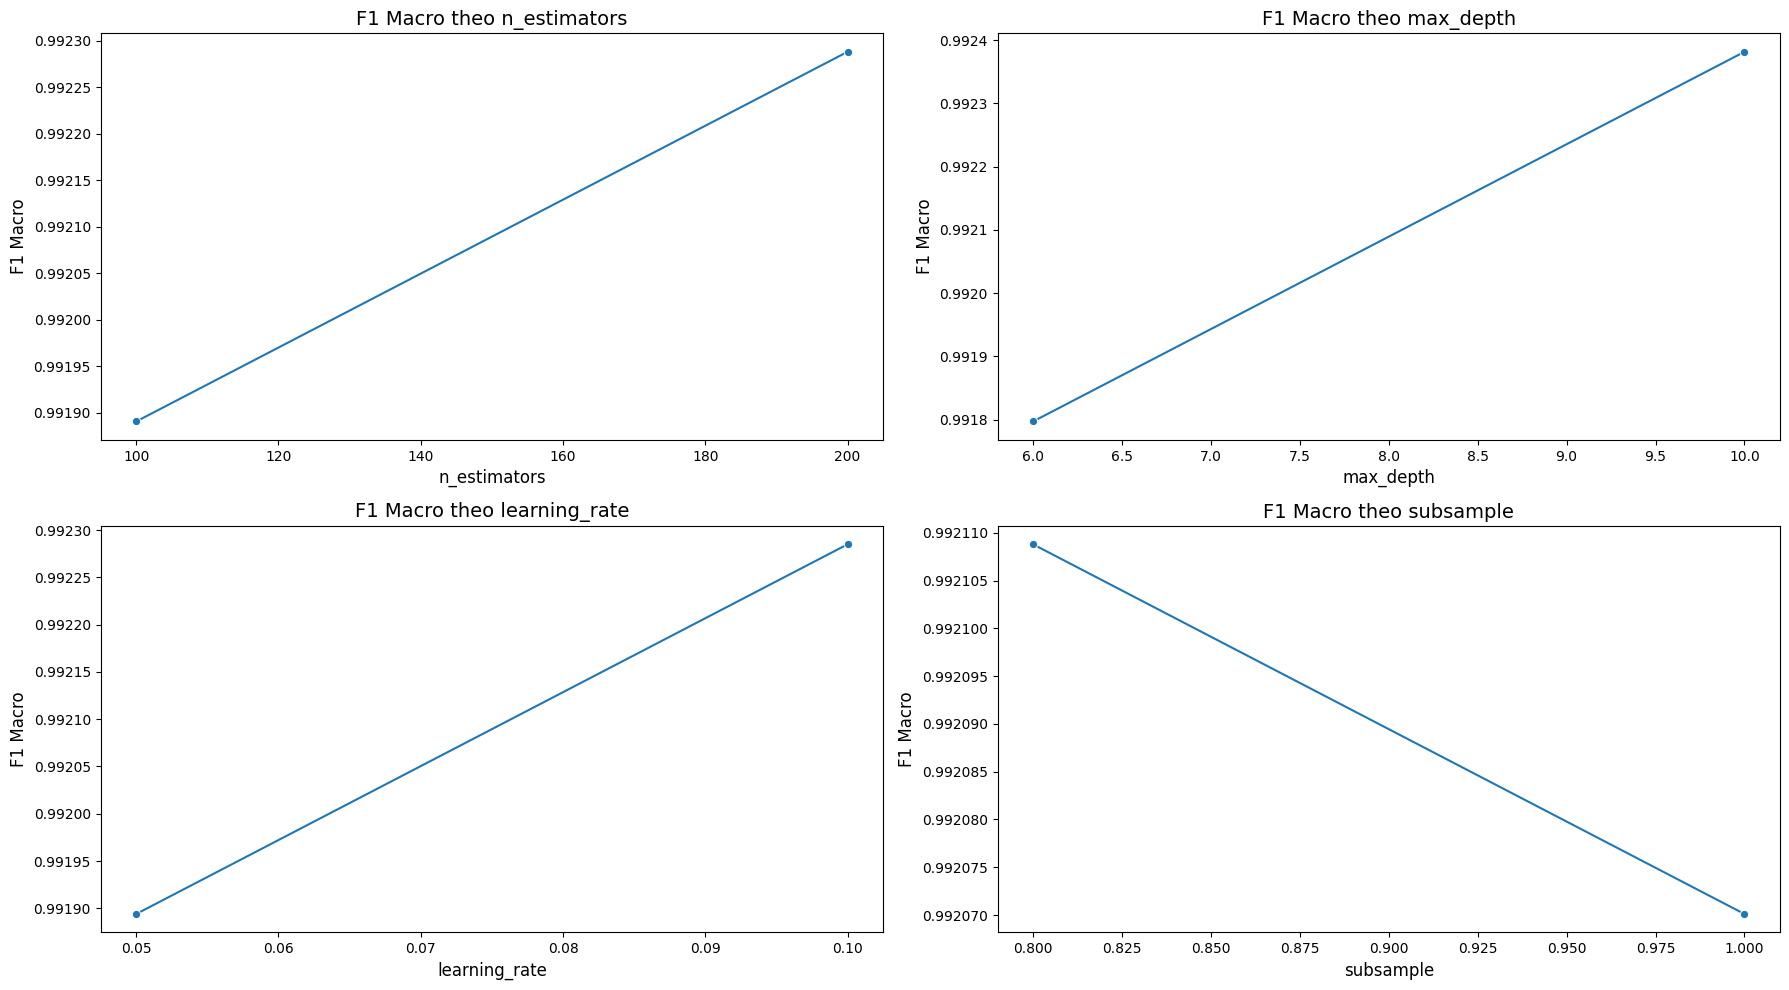

In [87]:
plt.figure(figsize=(18, 10))

# 1. F1 Macro theo n_estimators
plt.subplot(2, 2, 1)
sns.lineplot(
    data=df.groupby('n_estimators')['mean_test_score'].mean().reset_index(),
    x='n_estimators', y='mean_test_score', marker='o'
)
plt.title('F1 Macro theo n_estimators', fontsize=14)
plt.xlabel('n_estimators', fontsize=12)
plt.ylabel('F1 Macro', fontsize=12)

# 2. F1 Macro theo max_depth
plt.subplot(2, 2, 2)
sns.lineplot(
    data=df.groupby('max_depth')['mean_test_score'].mean().reset_index(),
    x='max_depth', y='mean_test_score', marker='o'
)
plt.title('F1 Macro theo max_depth', fontsize=14)
plt.xlabel('max_depth', fontsize=12)
plt.ylabel('F1 Macro', fontsize=12)

# 3. F1 Macro theo learning_rate
plt.subplot(2, 2, 3)
sns.lineplot(
    data=df.groupby('learning_rate')['mean_test_score'].mean().reset_index(),
    x='learning_rate', y='mean_test_score', marker='o'
)
plt.title('F1 Macro theo learning_rate', fontsize=14)
plt.xlabel('learning_rate', fontsize=12)
plt.ylabel('F1 Macro', fontsize=12)

# 4. F1 Macro theo subsample
plt.subplot(2, 2, 4)
sns.lineplot(
    data=df.groupby('subsample')['mean_test_score'].mean().reset_index(),
    x='subsample', y='mean_test_score', marker='o'
)
plt.title('F1 Macro theo subsample', fontsize=14)
plt.xlabel('subsample', fontsize=12)
plt.ylabel('F1 Macro', fontsize=12)

plt.tight_layout()
plt.show()


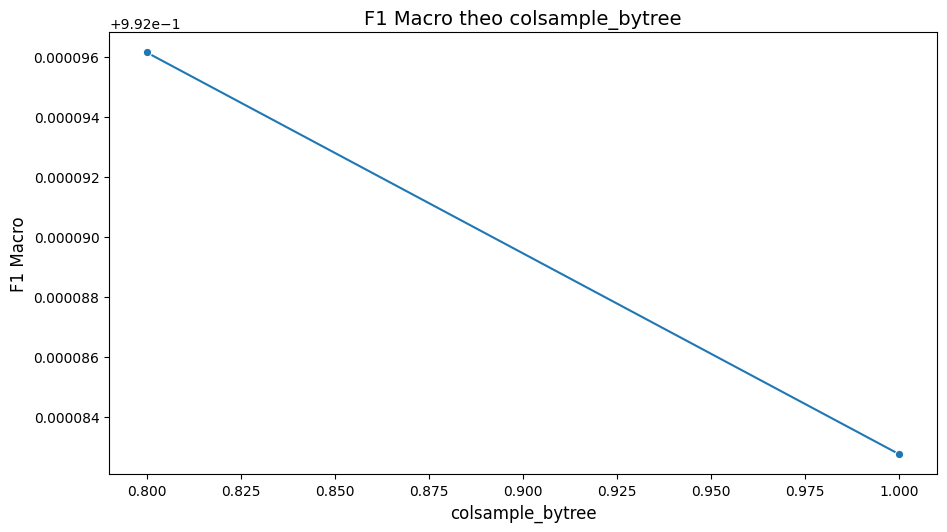

In [91]:
plt.figure(figsize=(18, 10))

# 5. F1 theo colsample_bytree
plt.subplot(2, 2, 1)
sns.lineplot(
    data=df.groupby('colsample_bytree')['mean_test_score'].mean().reset_index(),
    x='colsample_bytree', y='mean_test_score', marker='o'
)
plt.title('F1 Macro theo colsample_bytree', fontsize=14)
plt.xlabel('colsample_bytree', fontsize=12)
plt.ylabel('F1 Macro', fontsize=12)
plt.ticklabel_format(style='plain', axis='y')

plt.tight_layout()
plt.show()

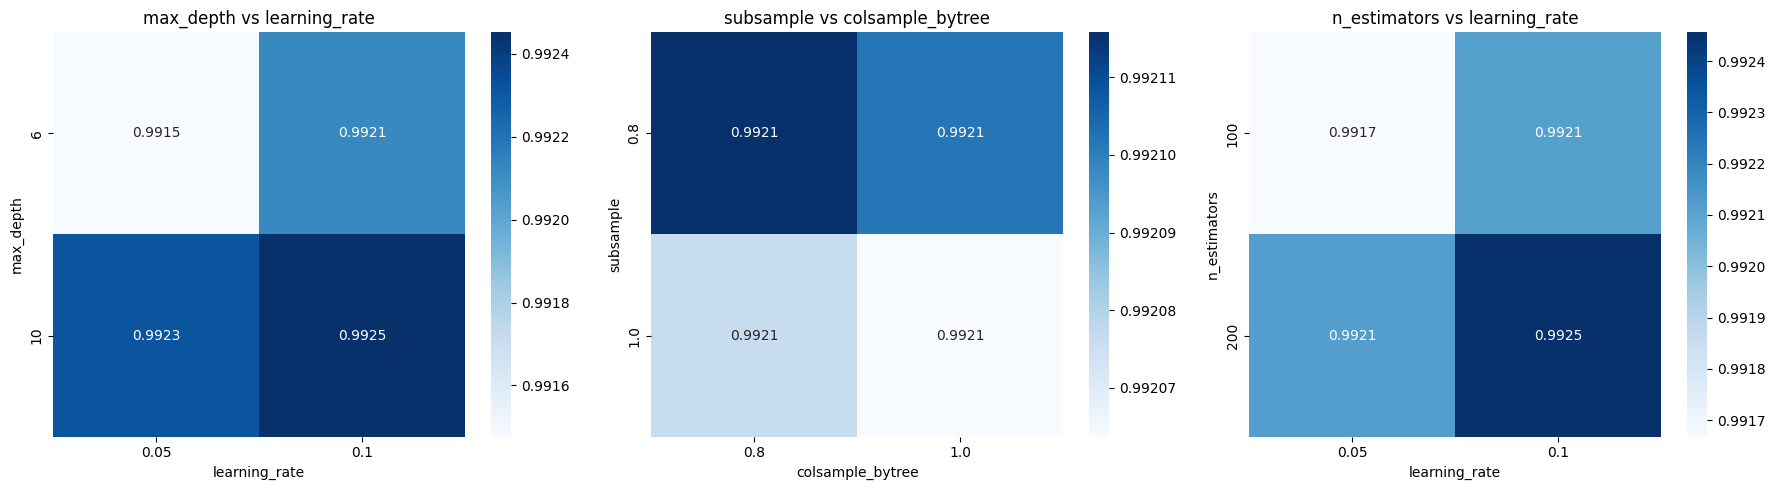

In [94]:
# Vẽ lại heatmap với cột đã đổi tên
plt.figure(figsize=(18, 5))

# 1. Heatmap: max_depth vs learning_rate
plt.subplot(1, 3, 1)
pivot1 = df.pivot_table(
    values='mean_test_score',
    index='max_depth',
    columns='learning_rate'
)
sns.heatmap(pivot1, annot=True, fmt=".4f", cmap="Blues")
plt.title("max_depth vs learning_rate")
plt.xlabel("learning_rate")
plt.ylabel("max_depth")

# 2. Heatmap: subsample vs colsample_bytree
plt.subplot(1, 3, 2)
pivot2 = df.pivot_table(
    values='mean_test_score',
    index='subsample',
    columns='colsample_bytree'
)
sns.heatmap(pivot2, annot=True, fmt=".4f", cmap="Blues")
plt.title("subsample vs colsample_bytree")
plt.xlabel("colsample_bytree")
plt.ylabel("subsample")

# 3. Heatmap: n_estimators vs learning_rate
plt.subplot(1, 3, 3)
pivot3 = df.pivot_table(
    values='mean_test_score',
    index='n_estimators',
    columns='learning_rate'
)
sns.heatmap(pivot3, annot=True, fmt=".4f", cmap="Blues")
plt.title("n_estimators vs learning_rate")
plt.xlabel("learning_rate")
plt.ylabel("n_estimators")

plt.tight_layout()
plt.show()

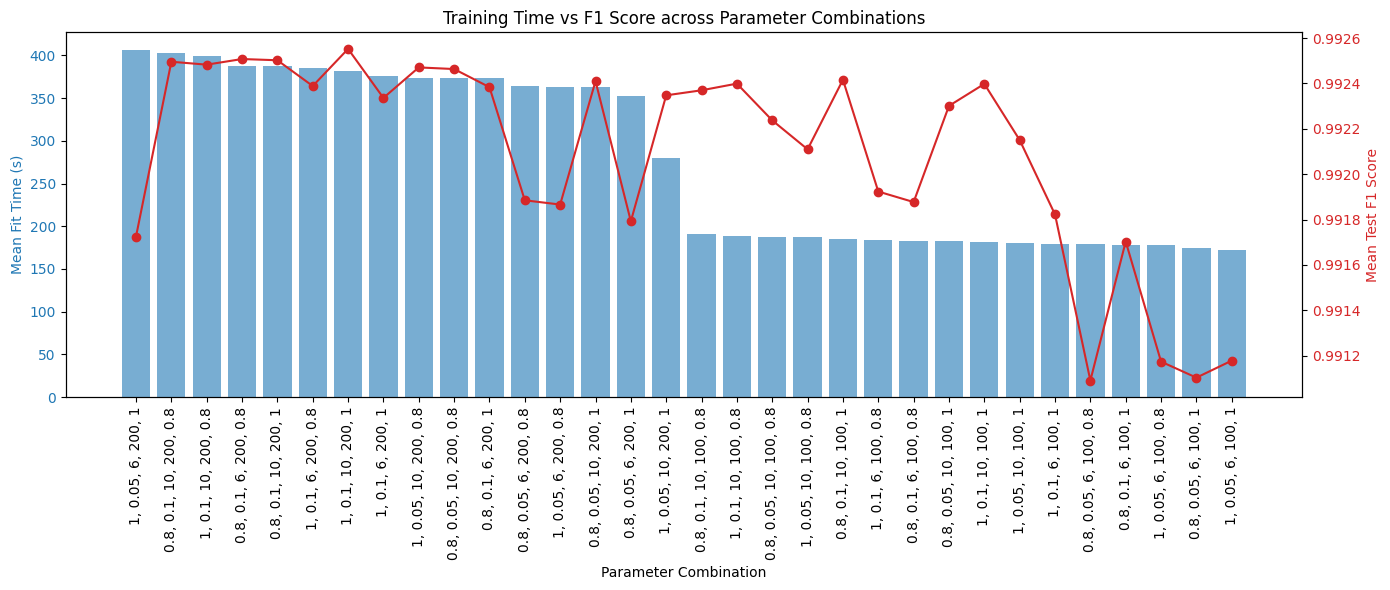

In [95]:
import pandas as pd
import matplotlib.pyplot as plt

# Giả sử bạn đã có results_df từ grid_search.cv_results_
results_df = pd.DataFrame(grid_search.cv_results_)

# Tạo cột chuỗi tham số
param_cols = [col for col in results_df.columns if col.startswith('param_')]
results_df['param_combo'] = results_df[param_cols].astype(str).agg(', '.join, axis=1)

# Sắp xếp theo thời gian
results_sorted = results_df.sort_values(by='mean_fit_time', ascending=False)

# Vẽ biểu đồ hai trục Y
fig, ax1 = plt.subplots(figsize=(14, 6))

# Trục Y trái: Thời gian huấn luyện
color = 'tab:blue'
ax1.set_xlabel('Parameter Combination')
ax1.set_ylabel('Mean Fit Time (s)', color=color)
ax1.bar(results_sorted['param_combo'], results_sorted['mean_fit_time'], color=color, alpha=0.6, label='Fit Time')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticklabels(results_sorted['param_combo'], rotation=90, ha='center')

# Trục Y phải: F1 macro
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Mean Test F1 Score', color=color)
ax2.plot(results_sorted['param_combo'], results_sorted['mean_test_score'], color=color, marker='o', label='F1 Score')
ax2.tick_params(axis='y', labelcolor=color)

# Tiêu đề và căn chỉnh
plt.title('Training Time vs F1 Score across Parameter Combinations')
fig.tight_layout()
plt.show()

In [45]:
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import classification_report

# Tính trọng số mẫu với class_weight='balanced'
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)

# Các tham số tối ưu
best_params = {
    'colsample_bytree': 1,
    'learning_rate': 0.1,
    'max_depth': 10,
    'n_estimators': 200,
    'subsample': 1
}

# Khởi tạo mô hình với các tham số tối ưu
xgb_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='mlogloss',
    objective='multi:softprob',
    num_class=len(y.unique()),  # Đảm bảo số lớp phù hợp với dữ liệu
    n_jobs=-1,
    verbosity=1,
    **best_params  # Truyền tham số tối ưu vào
)

# Huấn luyện mô hình với eval_set và theo dõi quá trình huấn luyện
evals_result = {}  # Khởi tạo evals_result
xgb_model.fit(X_train, y_train, sample_weight=sample_weights, 
              eval_set=[(X_train, y_train), (X_test, y_test)], 
              verbose=0) 

# Dự đoán và đánh giá
pred = xgb_model.predict(X_test)
xgb_report = classification_report(y_test, pred, digits=6)
print("=== Classification Report ===")
print(xgb_report)

=== Classification Report ===
              precision    recall  f1-score   support

           0   0.909459  0.964454  0.936149      4895
           1   1.000000  1.000000  1.000000     27458
           2   1.000000  0.999881  0.999940     16783
           3   1.000000  1.000000  1.000000     15688
           4   0.999652  0.998840  0.999246     17238
           5   0.999241  0.999747  0.999494     15799
           6   0.999620  0.999783  0.999701     18406
           7   0.999670  0.999546  0.999608     24241
           8   0.999437  0.999437  0.999437      8878
           9   0.999739  0.999217  0.999478     11498
          10   0.999460  0.999393  0.999427     14828
          11   0.999771  0.998625  0.999197      4363
          12   1.000000  0.999504  0.999752      4033
          13   0.983882  0.962308  0.972975     12496

    accuracy                       0.996353    196604
   macro avg   0.992138  0.994338  0.993172    196604
weighted avg   0.996467  0.996353  0.996382    196

# **ĐÁNH GIÁ MODEL**

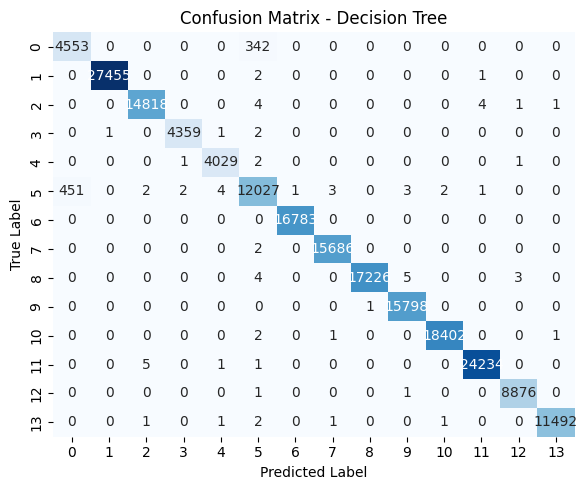

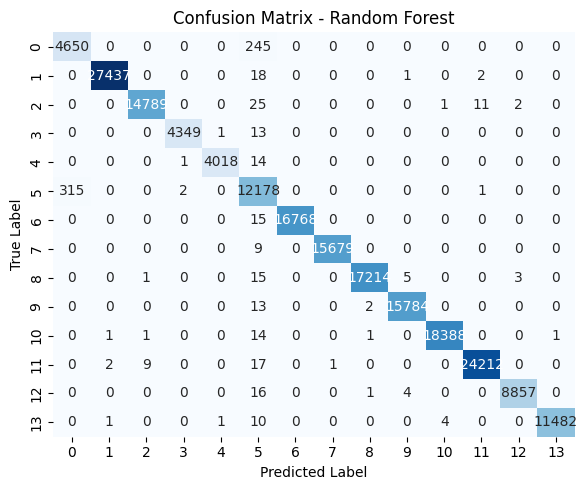

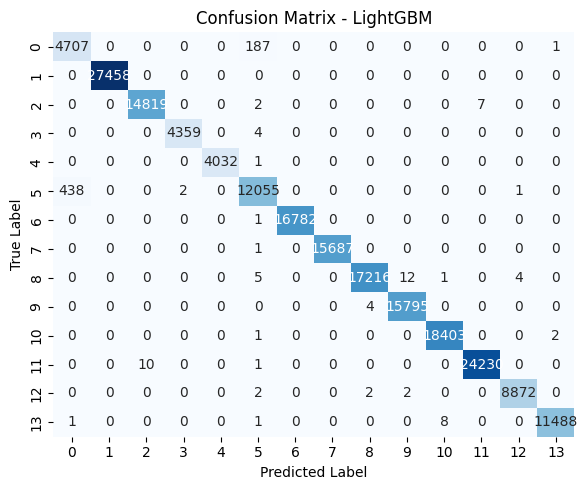

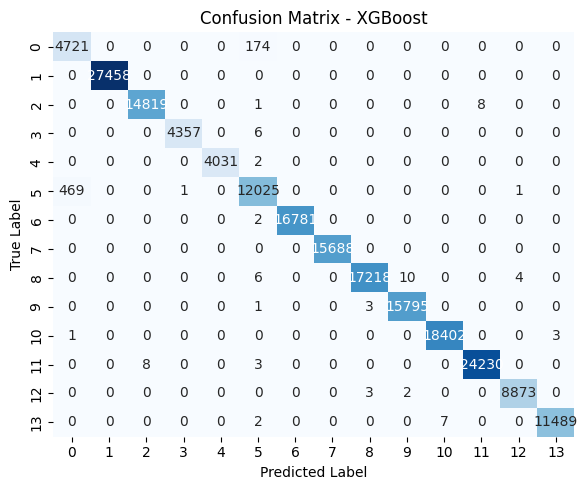

In [46]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Giả sử bạn đã có các mô hình đã huấn luyện và dự đoán sẵn:
models = {
    'Decision Tree': dt_model,
    'Random Forest': rf_model,
    'LightGBM': lgbm_model,
    'XGBoost': xgb_model
}

# Duyệt qua từng mô hình và vẽ confusion matrix
for name, model in models.items():
    # Dự đoán
    pred = model.predict(X_test)

    # Đảm bảo cả hai đều là string
    y_test_str = y_test.astype(str)
    pred_str = pred.astype(str)
    
    # Tính confusion matrix
    conf_matrix = confusion_matrix(y_test_str, pred_str)
    
    # Vẽ biểu đồ
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    plt.show()


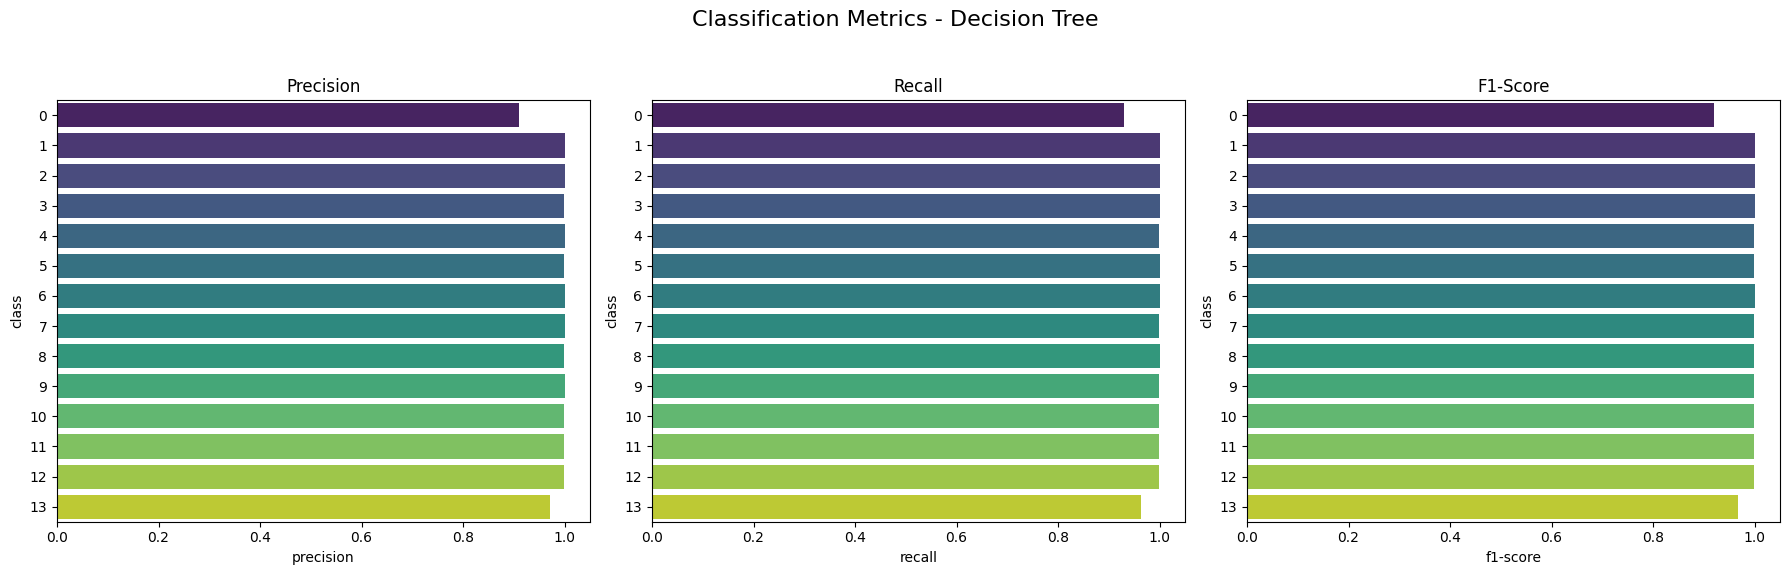

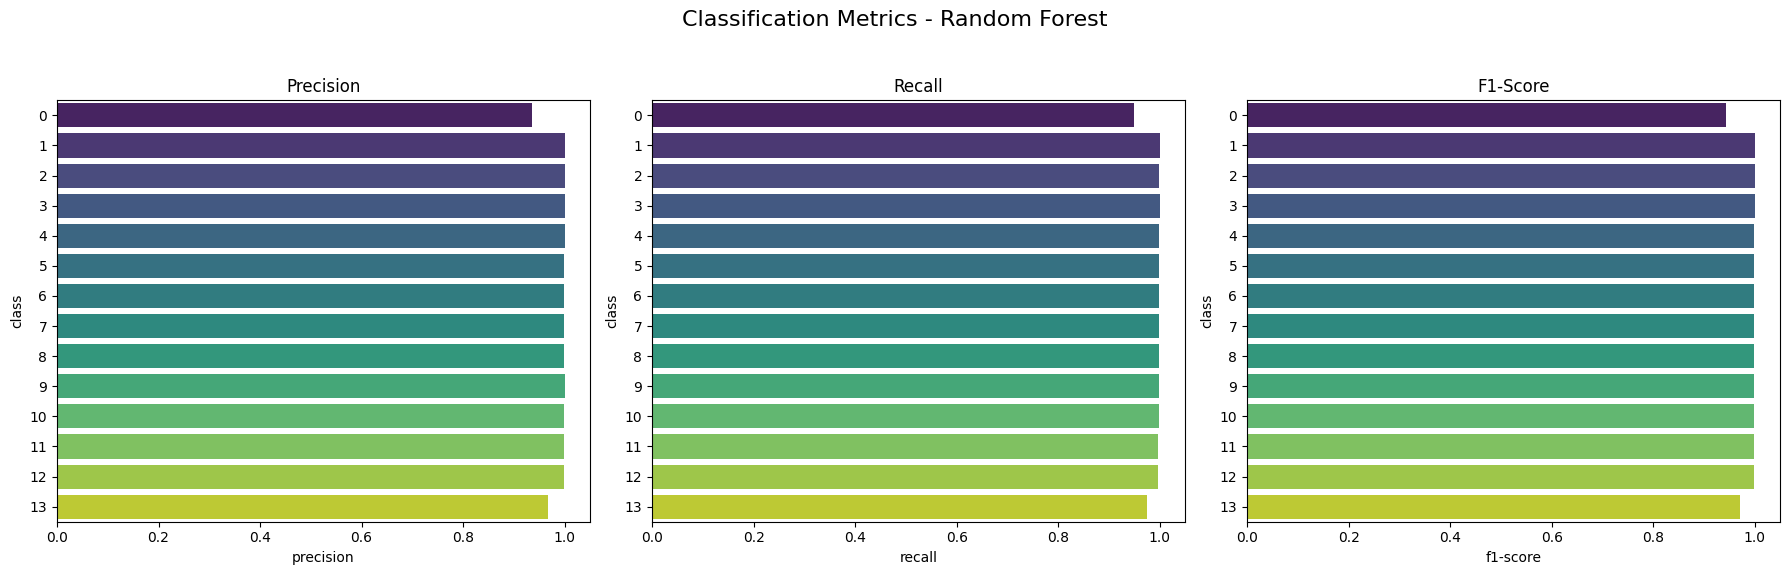

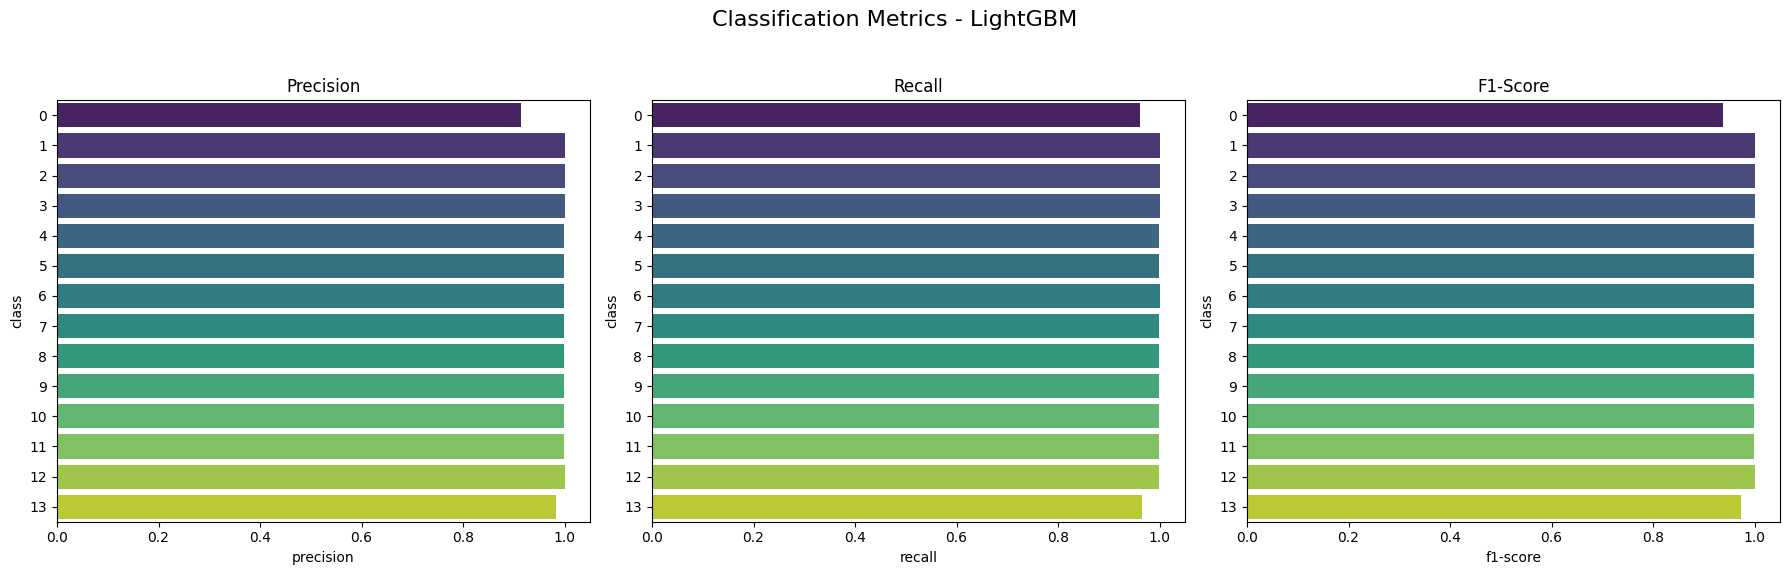

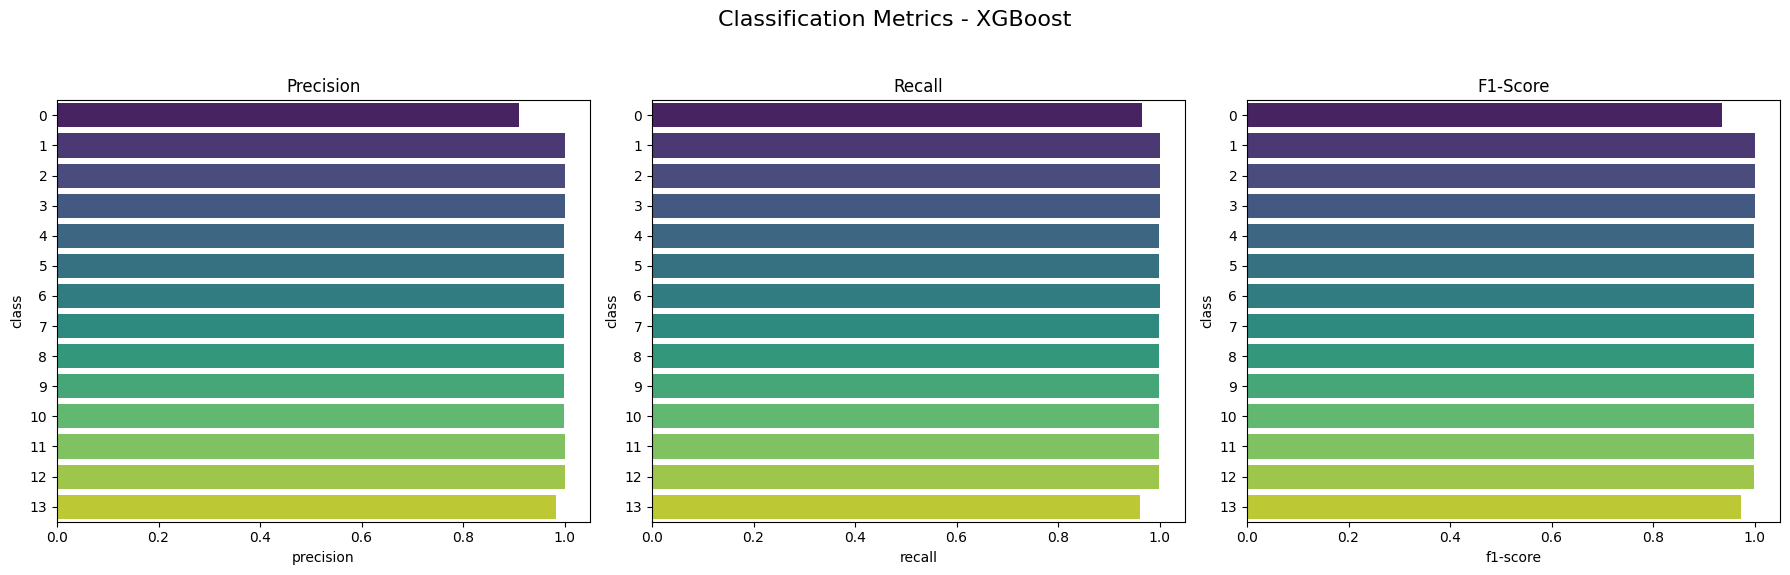

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Giả sử bạn đã có 4 chuỗi classification_report dạng text
reports = {
    'Decision Tree': dt_report,
    'Random Forest': rf_report,
    'LightGBM': lgbm_report,
    'XGBoost': xgb_report
}

for model_name, report_str in reports.items():
    report_data = []
    
    # Trích xuất dữ liệu từ report_str
    for row in report_str.split('\n')[2:-5]:  # bỏ phần header và footer
        row_data = row.split()
        if len(row_data) >= 4:  # đảm bảo có đủ cột
            report_data.append({
                'class': row_data[0],
                'precision': float(row_data[1]),
                'recall': float(row_data[2]),
                'f1-score': float(row_data[3])
            })

    df_report = pd.DataFrame(report_data)

    # Vẽ biểu đồ
    plt.figure(figsize=(18, 6))
    plt.suptitle(f'Classification Metrics - {model_name}', fontsize=16)

    # Precision
    plt.subplot(1, 3, 1)
    sns.barplot(x='precision', y='class', data=df_report, palette='viridis')
    plt.title('Precision')

    # Recall
    plt.subplot(1, 3, 2)
    sns.barplot(x='recall', y='class', data=df_report, palette='viridis')
    plt.title('Recall')

    # F1-Score
    plt.subplot(1, 3, 3)
    sns.barplot(x='f1-score', y='class', data=df_report, palette='viridis')
    plt.title('F1-Score')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

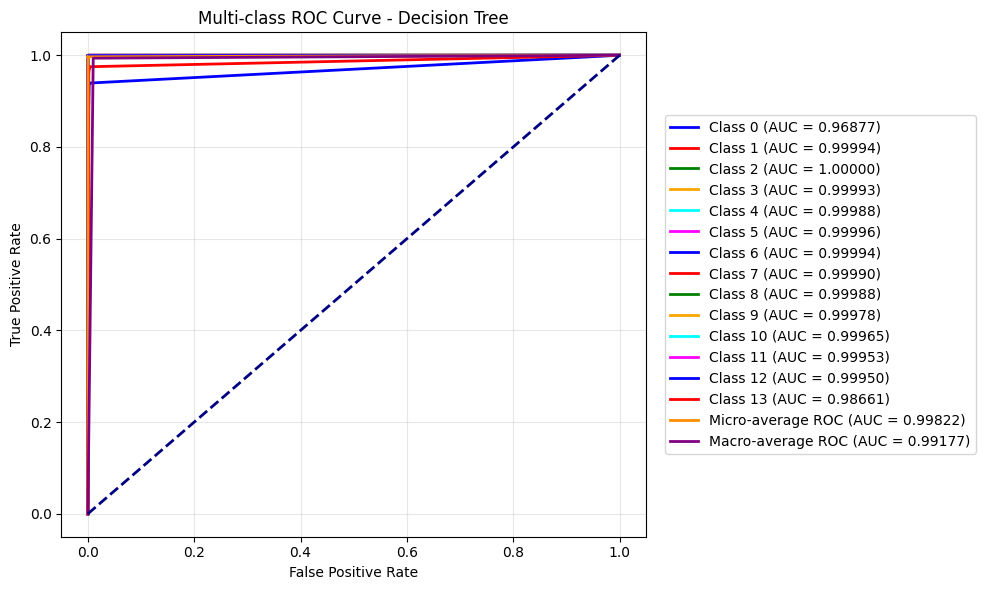

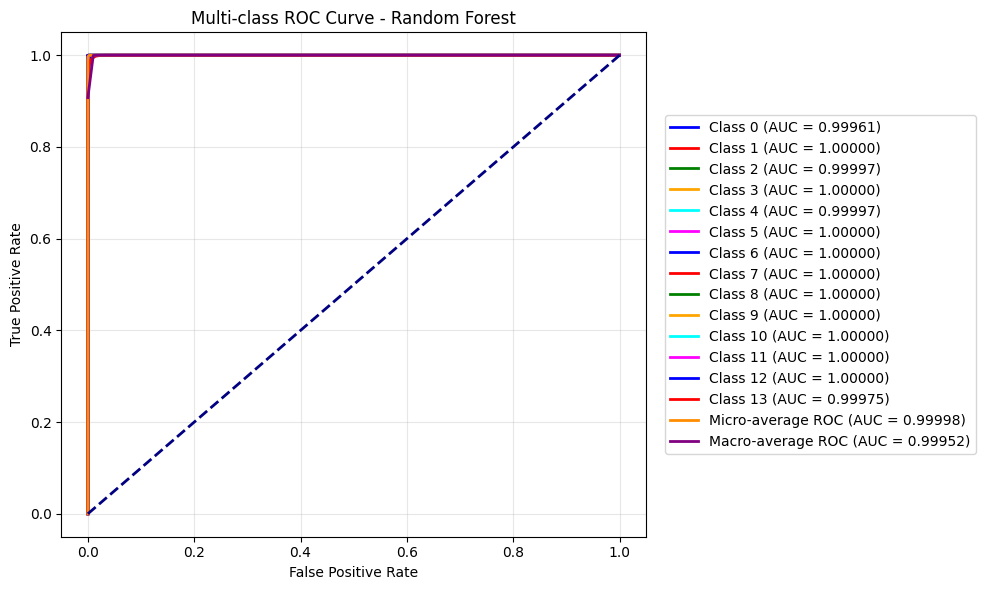

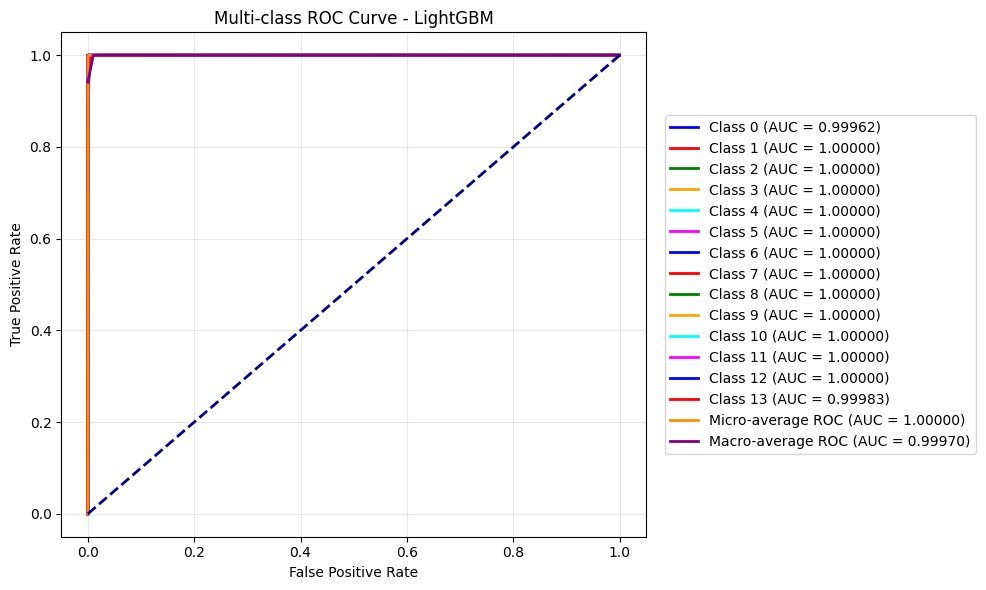

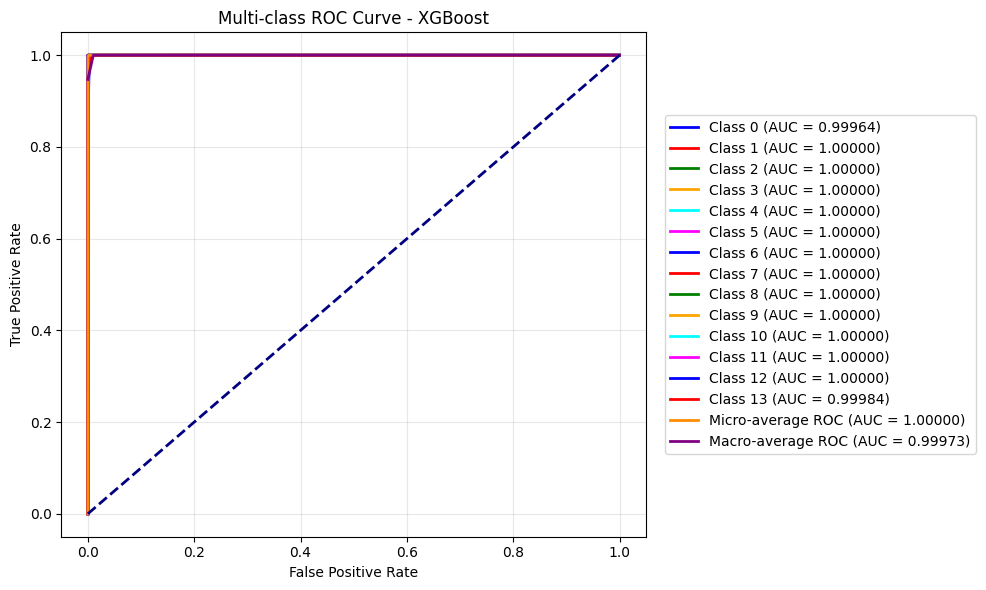

In [48]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

models = {
    'Decision Tree': dt_model,
    'Random Forest': rf_model,
    'LightGBM': lgbm_model,
    'XGBoost': xgb_model
}

# Binarize the output labels
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]
colors = ['blue', 'red', 'green', 'orange', 'cyan', 'magenta']

for name, model in models.items():
    # Dự đoán xác suất
    y_score = model.predict_proba(X_test)

    # ROC cho từng class
    fpr, tpr, roc_auc = {}, {}, {}
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Micro-average
    fpr_micro, tpr_micro, _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
    roc_auc_micro = auc(fpr_micro, tpr_micro)

    # Macro-average
    mean_fpr = np.linspace(0, 1, 100)
    mean_tpr = np.zeros_like(mean_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(mean_fpr, fpr[i], tpr[i])
    mean_tpr /= n_classes
    roc_auc_macro = auc(mean_fpr, mean_tpr)

    # Plot
    plt.figure(figsize=(10, 6))
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], color=colors[i % len(colors)], lw=2,
                 label=f'Class {i} (AUC = {roc_auc[i]:.5f})')

    plt.plot(fpr_micro, tpr_micro, color='darkorange', lw=2,
             label=f'Micro-average ROC (AUC = {roc_auc_micro:.5f})')
    plt.plot(mean_fpr, mean_tpr, color='purple', lw=2,
             label=f'Macro-average ROC (AUC = {roc_auc_macro:.5f})')

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Multi-class ROC Curve - {name}')
    plt.legend(loc='center left', bbox_to_anchor=(1.02, 0.5))
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()


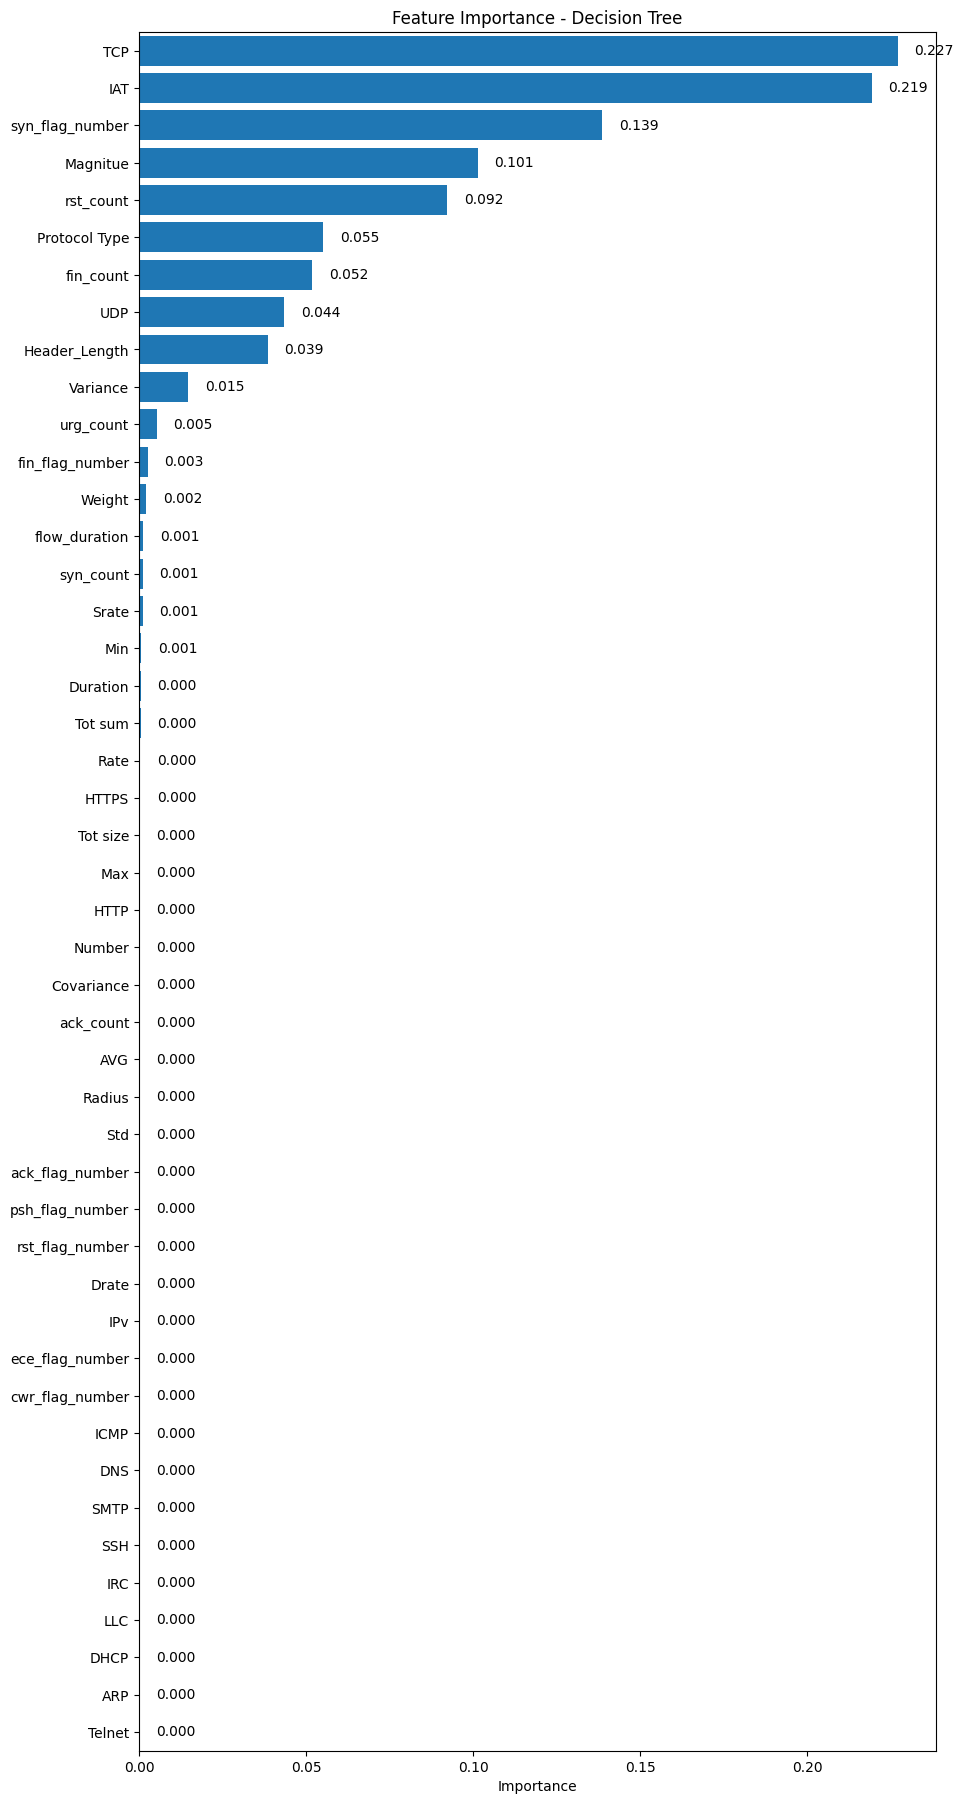

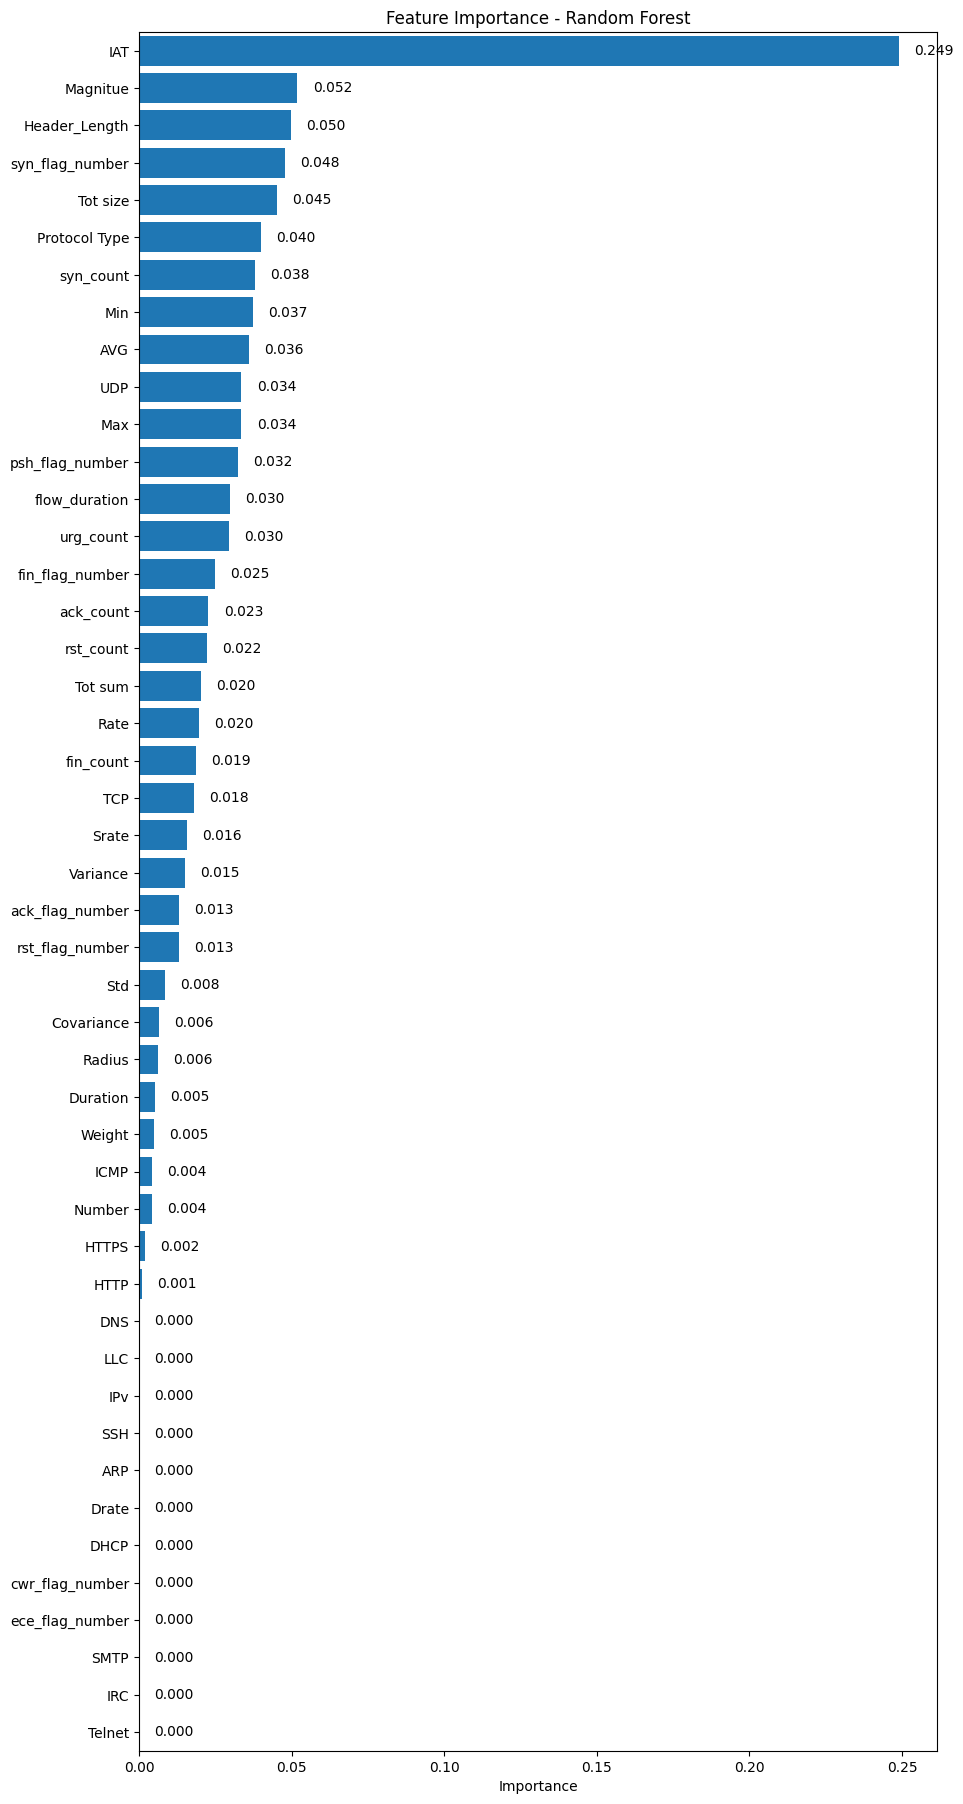

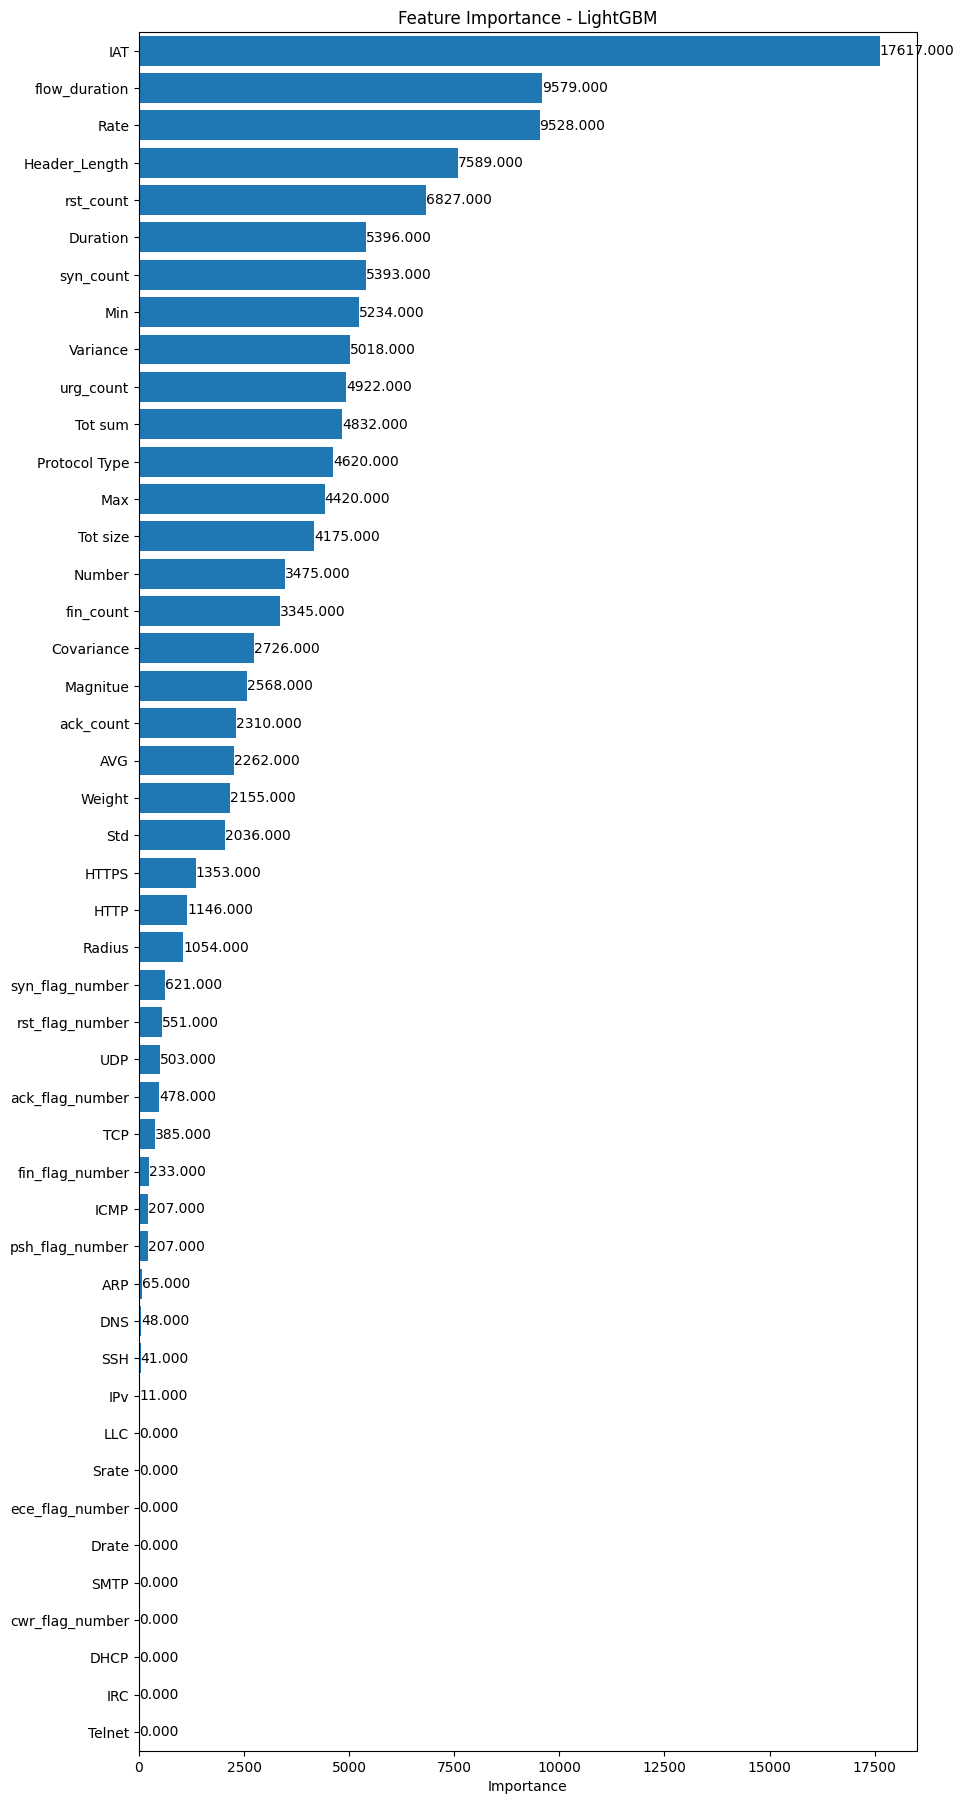

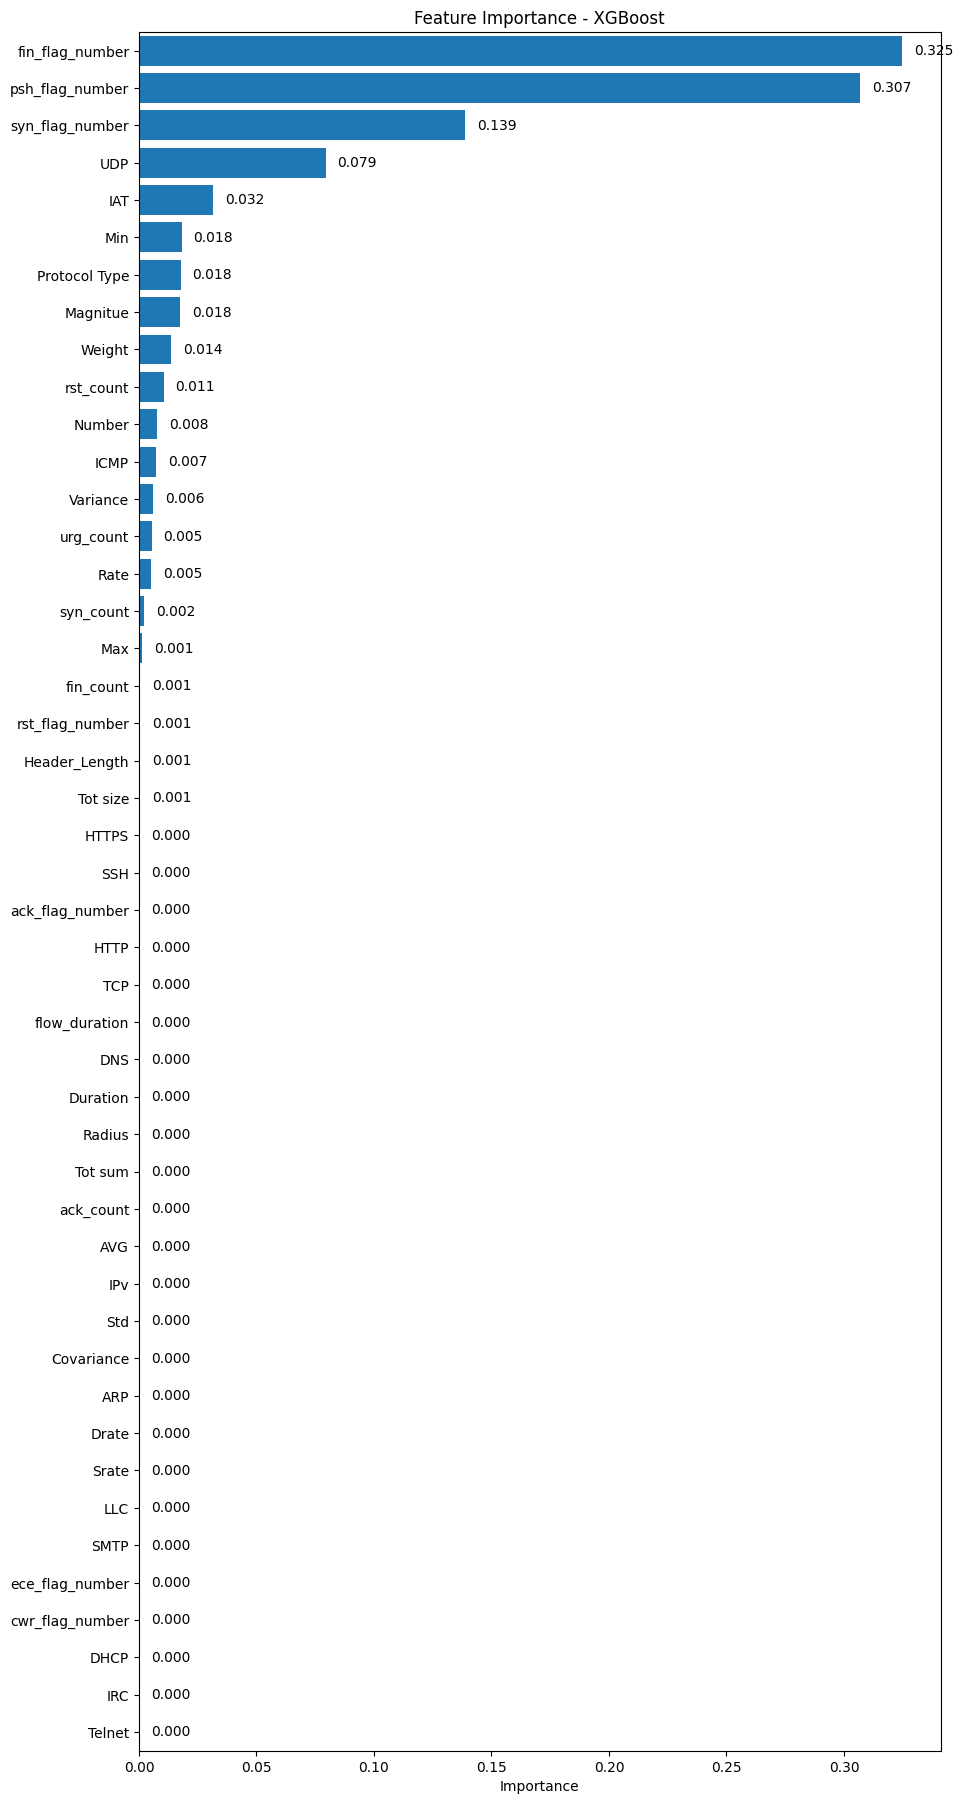

In [49]:
import matplotlib.pyplot as plt
import numpy as np

models = {
    'Decision Tree': dt_model,
    'Random Forest': rf_model,
    'LightGBM': lgbm_model,
    'XGBoost': xgb_model
}

feature_names = X_train.columns  # Giả sử X_train là DataFrame

for name, model in models.items():
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        sorted_idx = np.argsort(importances)[::-1]
        sorted_features = [feature_names[i] for i in sorted_idx]
        sorted_importances = [importances[i] for i in sorted_idx]

        # Plot
        plt.figure(figsize=(10, max(6, len(sorted_features) * 0.4)))
        bars = plt.barh(range(len(sorted_features)), sorted_importances, align='center')
        plt.yticks(ticks=range(len(sorted_features)), labels=sorted_features)
        plt.xlabel('Importance')
        plt.title(f'Feature Importance - {name}')
        plt.ylim(-0.5, len(sorted_features) - 0.5)

        for i, bar in enumerate(bars):
            width = bar.get_width()
            plt.text(width + 0.005, bar.get_y() + bar.get_height()/2,
                     f'{sorted_importances[i]:.3f}', va='center')

        plt.gca().invert_yaxis()
        plt.tight_layout(pad=2.0)
        plt.show()


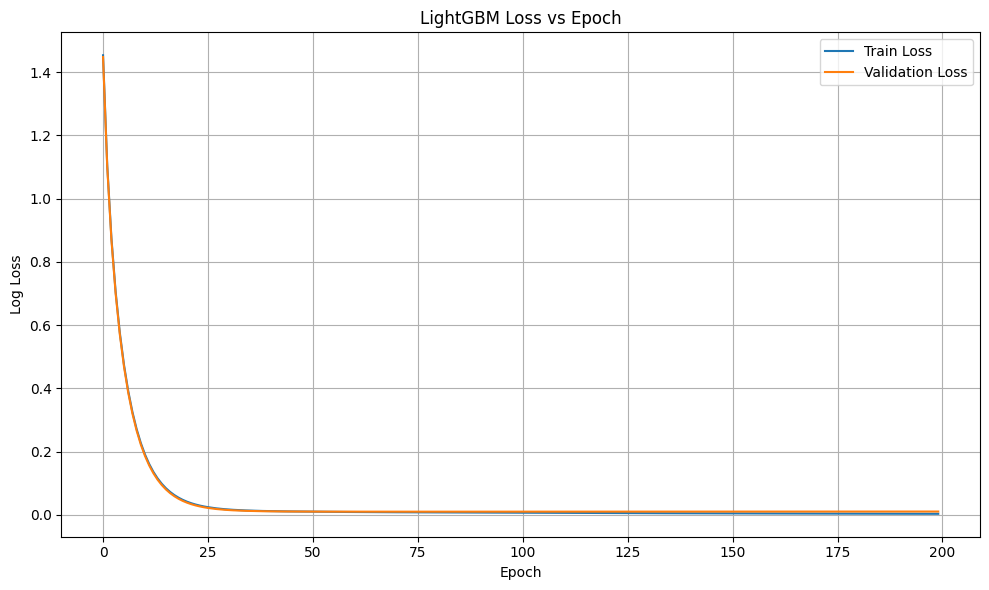

In [50]:

# Lấy kết quả loss để vẽ biểu đồ
evals_result = lgbm_model.evals_result_

# Vẽ biểu đồ Loss theo Epoch
plt.figure(figsize=(10, 6))
plt.plot(evals_result['training']['multi_logloss'], label='Train Loss')
plt.plot(evals_result['valid_1']['multi_logloss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Log Loss')
plt.title('LightGBM Loss vs Epoch')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

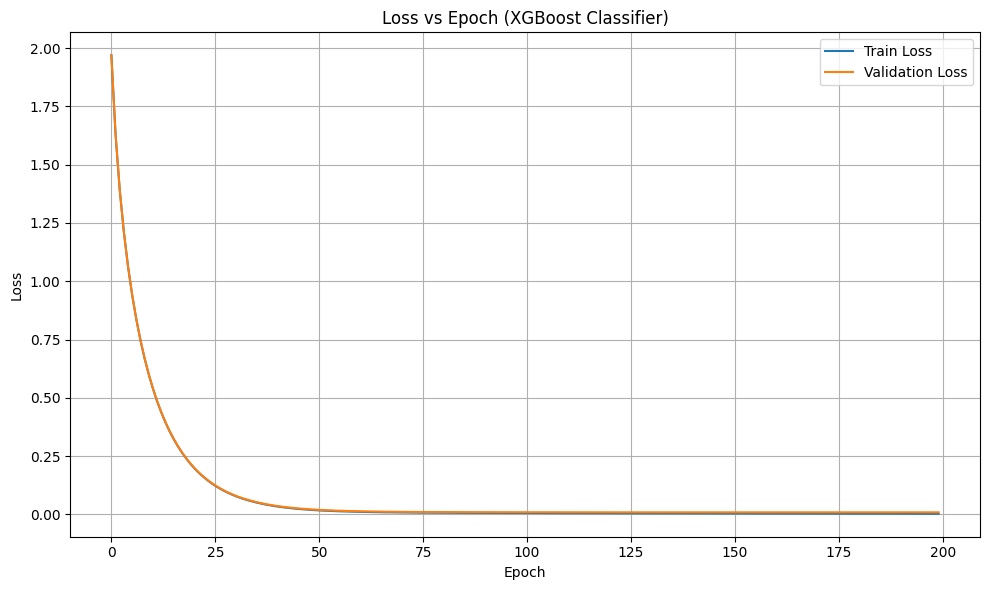

In [51]:

# Lấy kết quả loss từ evals_result
evals_result = xgb_model.evals_result()

# Vẽ biểu đồ Loss vs Epoch
plt.figure(figsize=(10, 6))
plt.plot(evals_result['validation_0']['mlogloss'], label='Train Loss')
plt.plot(evals_result['validation_1']['mlogloss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epoch (XGBoost Classifier)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**DONE**